In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/SUPERVISED MACHINE LEARNING COURSERA')

In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/Colab Notebooks/SUPERVISED MACHINE LEARNING COURSERA"
sys.path.append(os.path.abspath(py_file_location))

In [ ]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving plt_quad_logistic.py to plt_quad_logistic.py


In [ ]:
!pwd # Returns /content 
!ls


/content
drive  plt_quad_logistic.py  __pycache__  sample_data


In [ ]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

# Check your Colab temporary path
!pwd # Returns /content 

# Copy custom module from Google Drive to Colab temporary drive 
# !cp [path of your custom module] [path where you like to copy]
! cp /content/drive/MyDrive/Colab Notebooks/SUPERVISED MACHINE LEARNING COURSERA/plt_quad_logistic.py /content/plt_quad_logistic.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
cp: target '/content/plt_quad_logistic.py' is not a directory


In [ ]:
import plt_quad_logistic

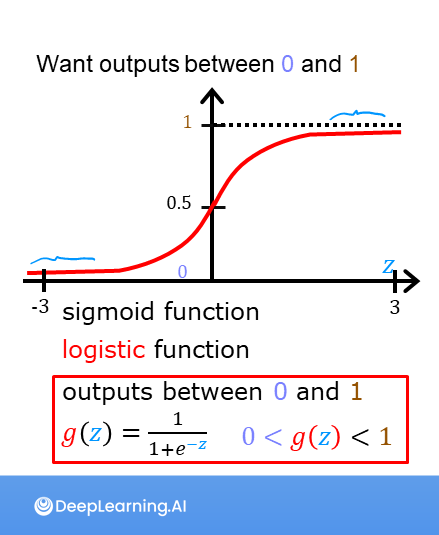

In [ ]:
  """
lab_utils_common
   contains common routines and variable definitions
   used by all the labs in this week.
   by contrast, specific, large plotting routines will be in separate files
   and are generally imported into the week where they are used.
   those files will import this file
"""
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output

np.set_printoptions(precision=2)

dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
plt.style.use('bmh')

def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

##########################################################
# Regression Routines
##########################################################

def predict_logistic(X, w, b):
    """ performs prediction """
    return sigmoid(X @ w + b)

def predict_linear(X, w, b):
    """ performs prediction """
    return X @ w + b

def compute_cost_logistic(X, y, w, b, lambda_=0, safe=False):
    """
    Computes cost using logistic loss, non-matrix version

    Args:
      X (ndarray): Shape (m,n)  matrix of examples with n features
      y (ndarray): Shape (m,)   target values
      w (ndarray): Shape (n,)   parameters for prediction
      b (scalar):               parameter  for prediction
      lambda_ : (scalar, float) Controls amount of regularization, 0 = no regularization
      safe : (boolean)          True-selects under/overflow safe algorithm
    Returns:
      cost (scalar): cost
    """

    m,n = X.shape
    cost = 0.0
    for i in range(m):
        z_i    = np.dot(X[i],w) + b                                             #(n,)(n,) or (n,) ()
        if safe:  #avoids overflows
            cost += -(y[i] * z_i ) + log_1pexp(z_i)
        else:
            f_wb_i = sigmoid(z_i)                                                   #(n,)
            cost  += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)       # scalar
    cost = cost/m

    reg_cost = 0
    if lambda_ != 0:
        for j in range(n):
            reg_cost += (w[j]**2)                                               # scalar
        reg_cost = (lambda_/(2*m))*reg_cost

    return cost + reg_cost


def log_1pexp(x, maximum=20):
    ''' approximate log(1+exp^x)
        https://stats.stackexchange.com/questions/475589/numerical-computation-of-cross-entropy-in-practice
    Args:
    x   : (ndarray Shape (n,1) or (n,)  input
    out : (ndarray Shape matches x      output ~= np.log(1+exp(x))
    '''

    out  = np.zeros_like(x,dtype=float)
    i    = x <= maximum
    ni   = np.logical_not(i)

    out[i]  = np.log(1 + np.exp(x[i]))
    out[ni] = x[ni]
    return out


def compute_cost_matrix(X, y, w, b, logistic=False, lambda_=0, safe=True):
    """
    Computes the cost using  using matrices
    Args:
      X : (ndarray, Shape (m,n))          matrix of examples
      y : (ndarray  Shape (m,) or (m,1))  target value of each example
      w : (ndarray  Shape (n,) or (n,1))  Values of parameter(s) of the model
      b : (scalar )                       Values of parameter of the model
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns:
      total_cost: (scalar)                cost
    """
    m = X.shape[0]
    y = y.reshape(-1,1)             # ensure 2D
    w = w.reshape(-1,1)             # ensure 2D
    if logistic:
        if safe:  #safe from overflow
            z = X @ w + b                                                           #(m,n)(n,1)=(m,1)
            cost = -(y * z) + log_1pexp(z)
            cost = np.sum(cost)/m                                                   # (scalar)
        else:
            f    = sigmoid(X @ w + b)                                               # (m,n)(n,1) = (m,1)
            cost = (1/m)*(np.dot(-y.T, np.log(f)) - np.dot((1-y).T, np.log(1-f)))   # (1,m)(m,1) = (1,1)
            cost = cost[0,0]                                                        # scalar
    else:
        f    = X @ w + b                                                        # (m,n)(n,1) = (m,1)
        cost = (1/(2*m)) * np.sum((f - y)**2)                                   # scalar

    reg_cost = (lambda_/(2*m)) * np.sum(w**2)                                   # scalar

    total_cost = cost + reg_cost                                                # scalar

    return total_cost                                                           # scalar

def compute_gradient_matrix(X, y, w, b, logistic=False, lambda_=0):
    """
    Computes the gradient using matrices

    Args:
      X : (ndarray, Shape (m,n))          matrix of examples
      y : (ndarray  Shape (m,) or (m,1))  target value of each example
      w : (ndarray  Shape (n,) or (n,1))  Values of parameters of the model
      b : (scalar )                       Values of parameter of the model
      logistic: (boolean)                 linear if false, logistic if true
      lambda_:  (float)                   applies regularization if non-zero
    Returns
      dj_dw: (array_like Shape (n,1))     The gradient of the cost w.r.t. the parameters w
      dj_db: (scalar)                     The gradient of the cost w.r.t. the parameter b
    """
    m = X.shape[0]
    y = y.reshape(-1,1)             # ensure 2D
    w = w.reshape(-1,1)             # ensure 2D

    f_wb  = sigmoid( X @ w + b ) if logistic else  X @ w + b      # (m,n)(n,1) = (m,1)
    err   = f_wb - y                                              # (m,1)
    dj_dw = (1/m) * (X.T @ err)                                   # (n,m)(m,1) = (n,1)
    dj_db = (1/m) * np.sum(err)                                   # scalar

    dj_dw += (lambda_/m) * w        # regularize                  # (n,1)

    return dj_db, dj_dw                                           # scalar, (n,1)

def gradient_descent(X, y, w_in, b_in, alpha, num_iters, logistic=False, lambda_=0, verbose=True):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray):    Shape (m,n)         matrix of examples
      y (ndarray):    Shape (m,) or (m,1) target value of each example
      w_in (ndarray): Shape (n,) or (n,1) Initial values of parameters of the model
      b_in (scalar):                      Initial value of parameter of the model
      logistic: (boolean)                 linear if false, logistic if true
      lambda_:  (float)                   applies regularization if non-zero
      alpha (float):                      Learning rate
      num_iters (int):                    number of iterations to run gradient descent

    Returns:
      w (ndarray): Shape (n,) or (n,1)    Updated values of parameters; matches incoming shape
      b (scalar):                         Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    w = w.reshape(-1,1)      #prep for matrix operations
    y = y.reshape(-1,1)

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient_matrix(X, y, w, b, logistic, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_matrix(X, y, w, b, logistic, lambda_) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            if verbose: print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w.reshape(w_in.shape), b, J_history  #return final w,b and J history for graphing

def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray): Shape (m,n) input data, m examples, n features

    Returns:
      X_norm (ndarray): Shape (m,n)  input normalized by column
      mu (ndarray):     Shape (n,)   mean of each feature
      sigma (ndarray):  Shape (n,)   standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

######################################################
# Common Plotting Routines
######################################################


def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors=dlblue, lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

def plt_tumor_data(x, y, ax):
    """ plots tumor data on one axis """
    pos = y == 1
    neg = y == 0

    ax.scatter(x[pos], y[pos], marker='x', s=80, c = 'red', label="malignant")
    ax.scatter(x[neg], y[neg], marker='o', s=100, label="benign", facecolors='none', edgecolors=dlblue,lw=3)
    ax.set_ylim(-0.175,1.1)
    ax.set_ylabel('y')
    ax.set_xlabel('Tumor Size')
    ax.set_title("Logistic Regression on Categorical Data")

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

# Draws a threshold at 0.5
def draw_vthresh(ax,x):
    """ draws a threshold """
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    ax.fill_between([xlim[0], x], [ylim[1], ylim[1]], alpha=0.2, color=dlblue)
    ax.fill_between([x, xlim[1]], [ylim[1], ylim[1]], alpha=0.2, color=dldarkred)
    ax.annotate("z >= 0", xy= [x,0.5], xycoords='data',
                xytext=[30,5],textcoords='offset points')
    d = FancyArrowPatch(
        posA=(x, 0.5), posB=(x+3, 0.5), color=dldarkred,
        arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    )
    ax.add_artist(d)
    ax.annotate("z < 0", xy= [x,0.5], xycoords='data',
                 xytext=[-50,5],textcoords='offset points', ha='left')
    f = FancyArrowPatch(
        posA=(x, 0.5), posB=(x-3, 0.5), color=dlblue,
        arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    )
    ax.add_artist(f)

In [ ]:
def draw_vthresh(ax,x):
    """ draws a threshold """
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    ax.fill_between([xlim[0], x], [ylim[1], ylim[1]], alpha=0.2, color=dlblue)
    ax.fill_between([x, xlim[1]], [ylim[1], ylim[1]], alpha=0.2, color=dldarkred)
    ax.annotate("z >= 0", xy= [x,0.5], xycoords='data',
                xytext=[30,5],textcoords='offset points')
    d = FancyArrowPatch(
        posA=(x, 0.5), posB=(x+3, 0.5), color=dldarkred,
        arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    )
    ax.add_artist(d)
    ax.annotate("z < 0", xy= [x,0.5], xycoords='data',
                 xytext=[-50,5],textcoords='offset points', ha='left')
    f = FancyArrowPatch(
        posA=(x, 0.5), posB=(x-3, 0.5), color=dlblue,
        arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    )
    ax.add_artist(f)

In [ ]:
import time
import copy
from ipywidgets import Output
from matplotlib.widgets import Button, CheckButtons
from matplotlib.patches import FancyArrowPatch
#from lab_utils_common import np, plt, dlblue, dlorange, sigmoid, dldarkred, gradient_descent

# for debug
#output = Output() # sends hidden error messages to display when using widgets
#display(output)

class plt_one_addpt_onclick:
    """ class to run one interactive plot """
    def __init__(self, x, y, w, b, logistic=True):
        self.logistic=logistic
        pos = y == 1
        neg = y == 0

        fig,ax = plt.subplots(1,1,figsize=(8,4))
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False

        plt.subplots_adjust(bottom=0.25)
        ax.scatter(x[pos], y[pos], marker='x', s=80, c = 'red', label="malignant")
        ax.scatter(x[neg], y[neg], marker='o', s=100, label="benign", facecolors='none', edgecolors=dlblue,lw=3)
        ax.set_ylim(-0.05,1.1)
        xlim = ax.get_xlim()
        ax.set_xlim(xlim[0],xlim[1]*2)
        ax.set_ylabel('y')
        ax.set_xlabel('Tumor Size')
        self.alegend = ax.legend(loc='lower right')
        if self.logistic:
            ax.set_title("Example of Logistic Regression on Categorical Data")
        else:
            ax.set_title("Example of Linear Regression on Categorical Data")

        ax.text(0.65,0.8,"[Click to add data points]", size=10, transform=ax.transAxes)

        axcalc   = plt.axes([0.1, 0.05, 0.38, 0.075])  #l,b,w,h
        axthresh = plt.axes([0.5, 0.05, 0.38, 0.075])  #l,b,w,h
        self.tlist = []

        self.fig = fig
        self.ax = [ax,axcalc,axthresh]
        self.x = x
        self.y = y
        self.w = copy.deepcopy(w)
        self.b = b
        f_wb = np.matmul(self.x.reshape(-1,1), self.w) + self.b
        if self.logistic:
            self.aline = self.ax[0].plot(self.x, sigmoid(f_wb), color=dlblue)
            self.bline = self.ax[0].plot(self.x, f_wb, color=dlorange,lw=1)
        else:
            self.aline = self.ax[0].plot(self.x, sigmoid(f_wb), color=dlblue)

        self.cid = fig.canvas.mpl_connect('button_press_event', self.add_data)
        if self.logistic:
            self.bcalc = Button(axcalc, 'Run Logistic Regression (click)', color=dlblue)
            self.bcalc.on_clicked(self.calc_logistic)
        else:
            self.bcalc = Button(axcalc, 'Run Linear Regression (click)', color=dlblue)
            self.bcalc.on_clicked(self.calc_linear)
        self.bthresh = CheckButtons(axthresh, ('Toggle 0.5 threshold (after regression)',))
        self.bthresh.on_clicked(self.thresh)
        self.resize_sq(self.bthresh)

 #   @output.capture()  # debug
    def add_data(self, event):
        #self.ax[0].text(0.1,0.1, f"in onclick")
        if event.inaxes == self.ax[0]:
            x_coord = event.xdata
            y_coord = event.ydata

            if y_coord > 0.5:
                self.ax[0].scatter(x_coord, 1, marker='x', s=80, c = 'red' )
                self.y = np.append(self.y,1)
            else:
                self.ax[0].scatter(x_coord, 0, marker='o', s=100, facecolors='none', edgecolors=dlblue,lw=3)
                self.y = np.append(self.y,0)
            self.x = np.append(self.x,x_coord)
        self.fig.canvas.draw()

#   @output.capture()  # debug
    def calc_linear(self, event):
        if self.bthresh.get_status()[0]:
            self.remove_thresh()
        for it in [1,1,1,1,1,2,4,8,16,32,64,128,256]:
            self.w, self.b, _ = gradient_descent(self.x.reshape(-1,1), self.y.reshape(-1,1),
                                                 self.w.reshape(-1,1), self.b, 0.01, it,
                                                 logistic=False, lambda_=0, verbose=False)
            self.aline[0].remove()
            self.alegend.remove()
            y_hat = np.matmul(self.x.reshape(-1,1), self.w) + self.b
            self.aline = self.ax[0].plot(self.x, y_hat, color=dlblue,
                                         label=f"y = {np.squeeze(self.w):0.2f}x+({self.b:0.2f})")
            self.alegend = self.ax[0].legend(loc='lower right')
            time.sleep(0.3)
            self.fig.canvas.draw()
        if self.bthresh.get_status()[0]:
            self.draw_thresh()
            self.fig.canvas.draw()

    def calc_logistic(self, event):
        if self.bthresh.get_status()[0]:
            self.remove_thresh()
        for it in [1, 8,16,32,64,128,256,512,1024,2048,4096]:
            self.w, self.b, _ = gradient_descent(self.x.reshape(-1,1), self.y.reshape(-1,1),
                                                 self.w.reshape(-1,1), self.b, 0.1, it,
                                                 logistic=True, lambda_=0, verbose=False)
            self.aline[0].remove()
            self.bline[0].remove()
            self.alegend.remove()
            xlim  = self.ax[0].get_xlim()
            x_hat = np.linspace(*xlim, 30)
            y_hat = sigmoid(np.matmul(x_hat.reshape(-1,1), self.w) + self.b)
            self.aline = self.ax[0].plot(x_hat, y_hat, color=dlblue,
                                         label="y = sigmoid(z)")
            f_wb = np.matmul(x_hat.reshape(-1,1), self.w) + self.b
            self.bline = self.ax[0].plot(x_hat, f_wb, color=dlorange, lw=1,
                                         label=f"z = {np.squeeze(self.w):0.2f}x+({self.b:0.2f})")
            self.alegend = self.ax[0].legend(loc='lower right')
            time.sleep(0.3)
            self.fig.canvas.draw()
        if self.bthresh.get_status()[0]:
            self.draw_thresh()
            self.fig.canvas.draw()


    def thresh(self, event):
        if self.bthresh.get_status()[0]:
            #plt.figtext(0,0, f"in thresh {self.bthresh.get_status()}")
            self.draw_thresh()
        else:
            #plt.figtext(0,0.3, f"in thresh {self.bthresh.get_status()}")
            self.remove_thresh()

    def draw_thresh(self):
        ws = np.squeeze(self.w)
        xp5 = -self.b/ws if self.logistic else (0.5 - self.b) / ws
        ylim = self.ax[0].get_ylim()
        xlim = self.ax[0].get_xlim()
        a = self.ax[0].fill_between([xlim[0], xp5], [ylim[1], ylim[1]], alpha=0.2, color=dlblue)
        b = self.ax[0].fill_between([xp5, xlim[1]], [ylim[1], ylim[1]], alpha=0.2, color=dldarkred)
        c = self.ax[0].annotate("Malignant", xy= [xp5,0.5], xycoords='data',
             xytext=[30,5],textcoords='offset points')
        d = FancyArrowPatch(
            posA=(xp5, 0.5), posB=(xp5+1.5, 0.5), color=dldarkred,
            arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
        )
        self.ax[0].add_artist(d)

        e = self.ax[0].annotate("Benign", xy= [xp5,0.5], xycoords='data',
                     xytext=[-70,5],textcoords='offset points', ha='left')
        f = FancyArrowPatch(
            posA=(xp5, 0.5), posB=(xp5-1.5, 0.5), color=dlblue,
            arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
        )
        self.ax[0].add_artist(f)
        self.tlist = [a,b,c,d,e,f]

        self.fig.canvas.draw()

    def remove_thresh(self):
        #plt.figtext(0.5,0.0, f"rem thresh {self.bthresh.get_status()}")
        for artist in self.tlist:
            artist.remove()
        self.fig.canvas.draw()

    def resize_sq(self, bcid):
        """ resizes the check box """
        #future reference
        #print(f"width  : {bcid.rectangles[0].get_width()}")
        #print(f"height : {bcid.rectangles[0].get_height()}")
        #print(f"xy     : {bcid.rectangles[0].get_xy()}")
        #print(f"bb     : {bcid.rectangles[0].get_bbox()}")
        #print(f"points : {bcid.rectangles[0].get_bbox().get_points()}")  #[[xmin,ymin],[xmax,ymax]]

        h = bcid.rectangles[0].get_height()
        bcid.rectangles[0].set_height(3*h)

        ymax = bcid.rectangles[0].get_bbox().y1
        ymin = bcid.rectangles[0].get_bbox().y0

        bcid.lines[0][0].set_ydata([ymax,ymin])
        bcid.lines[0][1].set_ydata([ymin,ymax])

In [ ]:
# Input is an array. 
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1  
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.72  7.39 20.09]
Input to exp: 1
Output of exp: 2.718281828459045


In [ ]:
def sigmoid(z):
  """
  Compute the sigmoid of z
    Args: z(ndarray): A scalar, numpy array of any size
  Returns: 
    g(ndarray): sigmoid(z), with the same shape as z
  """
  g = 1/(1+np.exp(-z))

  return g
    

In [ ]:
#Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

#Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

#Code for  pretty printing the 2 arrays next to each other
np.set_printoptions(precision=3)
print("Input(z), Output (sigmoid(Z))")
print(np.c_[z_tmp,y])

Input(z), Output (sigmoid(Z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


In [ ]:
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output

In [ ]:
np.set_printoptions(precision=2)

dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
plt.style.use('bmh')

def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

##########################################################
# Regression Routines
##########################################################

def predict_logistic(X, w, b):
    """ performs prediction """
    return sigmoid(X @ w + b)

def predict_linear(X, w, b):
    """ performs prediction """
    return X @ w + b

def compute_cost_logistic(X, y, w, b, lambda_=0, safe=False):
    """
    Computes cost using logistic loss, non-matrix version

    Args:
      X (ndarray): Shape (m,n)  matrix of examples with n features
      y (ndarray): Shape (m,)   target values
      w (ndarray): Shape (n,)   parameters for prediction
      b (scalar):               parameter  for prediction
      lambda_ : (scalar, float) Controls amount of regularization, 0 = no regularization
      safe : (boolean)          True-selects under/overflow safe algorithm
    Returns:
      cost (scalar): cost
    """

    m,n = X.shape
    cost = 0.0
    for i in range(m):
        z_i    = np.dot(X[i],w) + b                                             #(n,)(n,) or (n,) ()
        if safe:  #avoids overflows
            cost += -(y[i] * z_i ) + log_1pexp(z_i)
        else:
            f_wb_i = sigmoid(z_i)                                                   #(n,)
            cost  += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)       # scalar
    cost = cost/m

    reg_cost = 0
    if lambda_ != 0:
        for j in range(n):
            reg_cost += (w[j]**2)                                               # scalar
        reg_cost = (lambda_/(2*m))*reg_cost

    return cost + reg_cost


def log_1pexp(x, maximum=20):
    ''' approximate log(1+exp^x)
        https://stats.stackexchange.com/questions/475589/numerical-computation-of-cross-entropy-in-practice
    Args:
    x   : (ndarray Shape (n,1) or (n,)  input
    out : (ndarray Shape matches x      output ~= np.log(1+exp(x))
    '''

    out  = np.zeros_like(x,dtype=float)
    i    = x <= maximum
    ni   = np.logical_not(i)

    out[i]  = np.log(1 + np.exp(x[i]))
    out[ni] = x[ni]
    return out


def compute_cost_matrix(X, y, w, b, logistic=False, lambda_=0, safe=True):
    """
    Computes the cost using  using matrices
    Args:
      X : (ndarray, Shape (m,n))          matrix of examples
      y : (ndarray  Shape (m,) or (m,1))  target value of each example
      w : (ndarray  Shape (n,) or (n,1))  Values of parameter(s) of the model
      b : (scalar )                       Values of parameter of the model
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns:
      total_cost: (scalar)                cost
    """
    m = X.shape[0]
    y = y.reshape(-1,1)             # ensure 2D
    w = w.reshape(-1,1)             # ensure 2D
    if logistic:
        if safe:  #safe from overflow
            z = X @ w + b                                                           #(m,n)(n,1)=(m,1)
            cost = -(y * z) + log_1pexp(z)
            cost = np.sum(cost)/m                                                   # (scalar)
        else:
            f    = sigmoid(X @ w + b)                                               # (m,n)(n,1) = (m,1)
            cost = (1/m)*(np.dot(-y.T, np.log(f)) - np.dot((1-y).T, np.log(1-f)))   # (1,m)(m,1) = (1,1)
            cost = cost[0,0]                                                        # scalar
    else:
        f    = X @ w + b                                                        # (m,n)(n,1) = (m,1)
        cost = (1/(2*m)) * np.sum((f - y)**2)                                   # scalar

    reg_cost = (lambda_/(2*m)) * np.sum(w**2)                                   # scalar

    total_cost = cost + reg_cost                                                # scalar

    return total_cost                                                           # scalar

def compute_gradient_matrix(X, y, w, b, logistic=False, lambda_=0):
    """
    Computes the gradient using matrices

    Args:
      X : (ndarray, Shape (m,n))          matrix of examples
      y : (ndarray  Shape (m,) or (m,1))  target value of each example
      w : (ndarray  Shape (n,) or (n,1))  Values of parameters of the model
      b : (scalar )                       Values of parameter of the model
      logistic: (boolean)                 linear if false, logistic if true
      lambda_:  (float)                   applies regularization if non-zero
    Returns
      dj_dw: (array_like Shape (n,1))     The gradient of the cost w.r.t. the parameters w
      dj_db: (scalar)                     The gradient of the cost w.r.t. the parameter b
    """
    m = X.shape[0]
    y = y.reshape(-1,1)             # ensure 2D
    w = w.reshape(-1,1)             # ensure 2D

    f_wb  = sigmoid( X @ w + b ) if logistic else  X @ w + b      # (m,n)(n,1) = (m,1)
    err   = f_wb - y                                              # (m,1)
    dj_dw = (1/m) * (X.T @ err)                                   # (n,m)(m,1) = (n,1)
    dj_db = (1/m) * np.sum(err)                                   # scalar

    dj_dw += (lambda_/m) * w        # regularize                  # (n,1)

    return dj_db, dj_dw                                           # scalar, (n,1)

def gradient_descent(X, y, w_in, b_in, alpha, num_iters, logistic=False, lambda_=0, verbose=True):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray):    Shape (m,n)         matrix of examples
      y (ndarray):    Shape (m,) or (m,1) target value of each example
      w_in (ndarray): Shape (n,) or (n,1) Initial values of parameters of the model
      b_in (scalar):                      Initial value of parameter of the model
      logistic: (boolean)                 linear if false, logistic if true
      lambda_:  (float)                   applies regularization if non-zero
      alpha (float):                      Learning rate
      num_iters (int):                    number of iterations to run gradient descent

    Returns:
      w (ndarray): Shape (n,) or (n,1)    Updated values of parameters; matches incoming shape
      b (scalar):                         Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    w = w.reshape(-1,1)      #prep for matrix operations
    y = y.reshape(-1,1)

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient_matrix(X, y, w, b, logistic, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_matrix(X, y, w, b, logistic, lambda_) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            if verbose: print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w.reshape(w_in.shape), b, J_history  #return final w,b and J history for graphing

def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray): Shape (m,n) input data, m examples, n features

    Returns:
      X_norm (ndarray): Shape (m,n)  input normalized by column
      mu (ndarray):     Shape (n,)   mean of each feature
      sigma (ndarray):  Shape (n,)   standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

######################################################
# Common Plotting Routines
######################################################


def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors=dlblue, lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

def plt_tumor_data(x, y, ax):
    """ plots tumor data on one axis """
    pos = y == 1
    neg = y == 0

    ax.scatter(x[pos], y[pos], marker='x', s=80, c = 'red', label="malignant")
    ax.scatter(x[neg], y[neg], marker='o', s=100, label="benign", facecolors='none', edgecolors=dlblue,lw=3)
    ax.set_ylim(-0.175,1.1)
    ax.set_ylabel('y')
    ax.set_xlabel('Tumor Size')
    ax.set_title("Logistic Regression on Categorical Data")

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

# Draws a threshold at 0.5
def draw_vthresh(ax,x):
    """ draws a threshold """
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    ax.fill_between([xlim[0], x], [ylim[1], ylim[1]], alpha=0.2, color=dlblue)
    ax.fill_between([x, xlim[1]], [ylim[1], ylim[1]], alpha=0.2, color=dldarkred)
    ax.annotate("z >= 0", xy= [x,0.5], xycoords='data',
                xytext=[30,5],textcoords='offset points')
    d = FancyArrowPatch(
        posA=(x, 0.5), posB=(x+3, 0.5), color=dldarkred,
        arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    )
    ax.add_artist(d)
    ax.annotate("z < 0", xy= [x,0.5], xycoords='data',
                 xytext=[-50,5],textcoords='offset points', ha='left')
    f = FancyArrowPatch(
        posA=(x, 0.5), posB=(x-3, 0.5), color=dlblue,
        arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    )
    ax.add_artist(f)


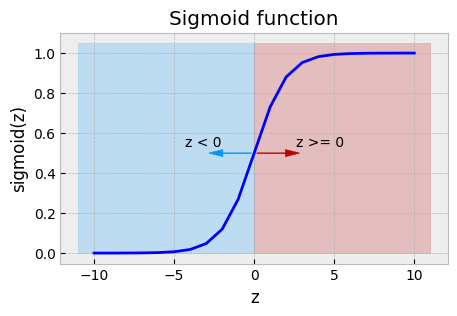

In [ ]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

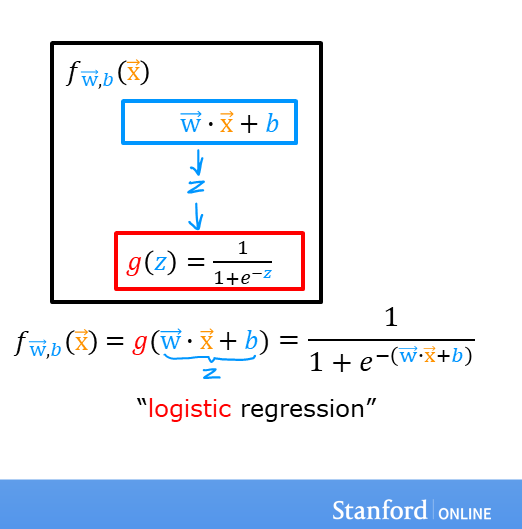

In [ ]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

w_in = np.zeros((1))
b_in = 0

<ipython-input-6-253e31e180a1>:179: MatplotlibDeprecationWarning: The rectangles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Any custom property styling may be lost.
  h = bcid.rectangles[0].get_height()
<ipython-input-6-253e31e180a1>:180: MatplotlibDeprecationWarning: The rectangles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Any custom property styling may be lost.
  bcid.rectangles[0].set_height(3*h)
<ipython-input-6-253e31e180a1>:182: MatplotlibDeprecationWarning: The rectangles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Any custom property styling may be lost.
  ymax = bcid.rectangles[0].get_bbox().y1
<ipython-input-6-253e31e180a1>:183: MatplotlibDeprecationWarning: The rectangles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Any custom property styling may be lost.
  ymin = bcid.rectangles[0].get_bbox().

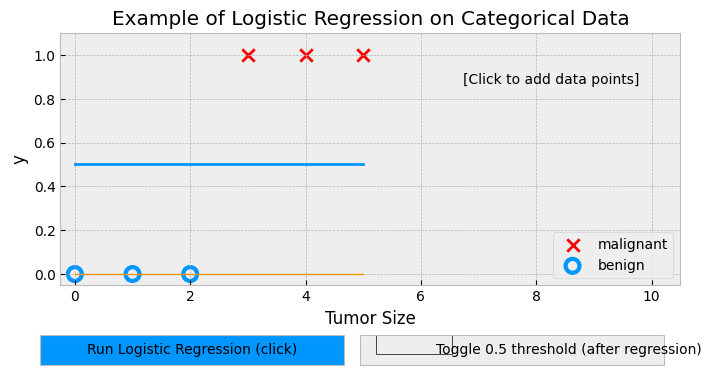

In [ ]:
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=True)

## Dataset

Let's suppose you have following training dataset
- The input variable `X` is a numpy array which has 6 training examples, each with two features
- The output variable `y` is also a numpy array with 6 examples, and `y` is either `0` or `1`

In [ ]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

### Plot data 

Let's use a helper function to plot this data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as blue circles. 

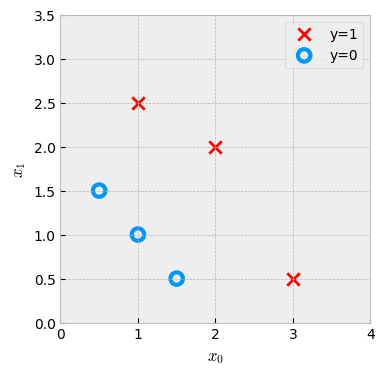

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X, y, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

## Logistic regression model


* Suppose you'd like to train a logistic regression model on this data which has the form   

  $f(x) = g(w_0x_0+w_1x_1 + b)$
  
  where $g(z) = \frac{1}{1+e^{-z}}$, which is the sigmoid function


* Let's say that you trained the model and get the parameters as $b = -3, w_0 = 1, w_1 = 1$. That is,

  $f(x) = g(x_0+x_1-3)$

  (You'll learn how to fit these parameters to the data further in the course)
  
  
Let's try to understand what this trained model is predicting by plotting its decision boundary

### Refresher on logistic regression and decision boundary

* Recall that for logistic regression, the model is represented as 

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$
  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$
  
  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$
  
  
* Let's plot the sigmoid function to see where $g(z) >= 0.5$

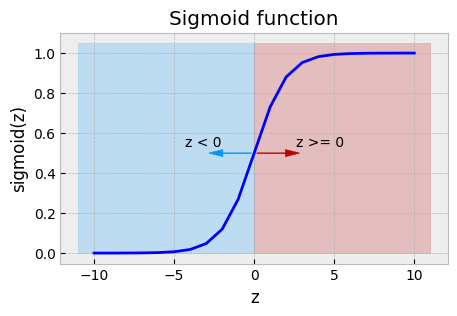

In [ ]:
# Plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

* As you can see, $g(z) >= 0.5$ for $z >=0$

* For a logistic regression model, $z = \mathbf{w} \cdot \mathbf{x} + b$. Therefore,

  if $\mathbf{w} \cdot \mathbf{x} + b >= 0$, the model predicts $y=1$
  
  if $\mathbf{w} \cdot \mathbf{x} + b < 0$, the model predicts $y=0$
  
  
  
### Plotting decision boundary

Now, let's go back to our example to understand how the logistic regression model is making predictions.

* Our logistic regression model has the form

  $f(\mathbf{x}) = g(-3 + x_0+x_1)$


* From what you've learnt above, you can see that this model predicts $y=1$ if $-3 + x_0+x_1 >= 0$

Let's see what this looks like graphically. We'll start by plotting $-3 + x_0+x_1 = 0$, which is equivalent to $x_1 = 3 - x_0$.

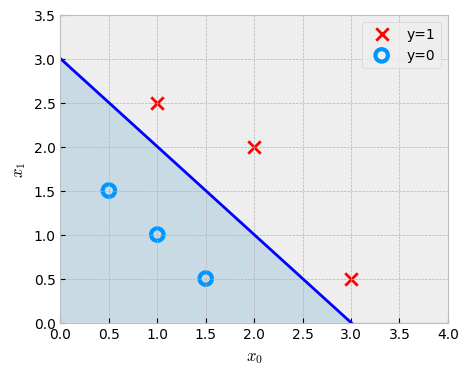

In [ ]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(X,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()


In the plot above, the blue line represents the line  𝑥0+𝑥1−3=0
  and it should intersect the x1 axis at 3 (if we set  𝑥1
  = 3,  𝑥0
  = 0) and the x0 axis at 3 (if we set  𝑥1
  = 0,  𝑥0
  = 3).
The shaded region represents  −3+𝑥0+𝑥1<0
 . The region above the line is  −3+𝑥0+𝑥1>0
 .
Any point in the shaded region (under the line) is classified as  𝑦=0
 . Any point on or above the line is classified as  𝑦=1
 . This line is known as the "decision boundary".
As we've seen in the lectures, by using higher order polynomial terms (eg:  𝑓(𝑥)=𝑔(𝑥20+𝑥1−1)
 , we can come up with more complex non-linear boundaries.

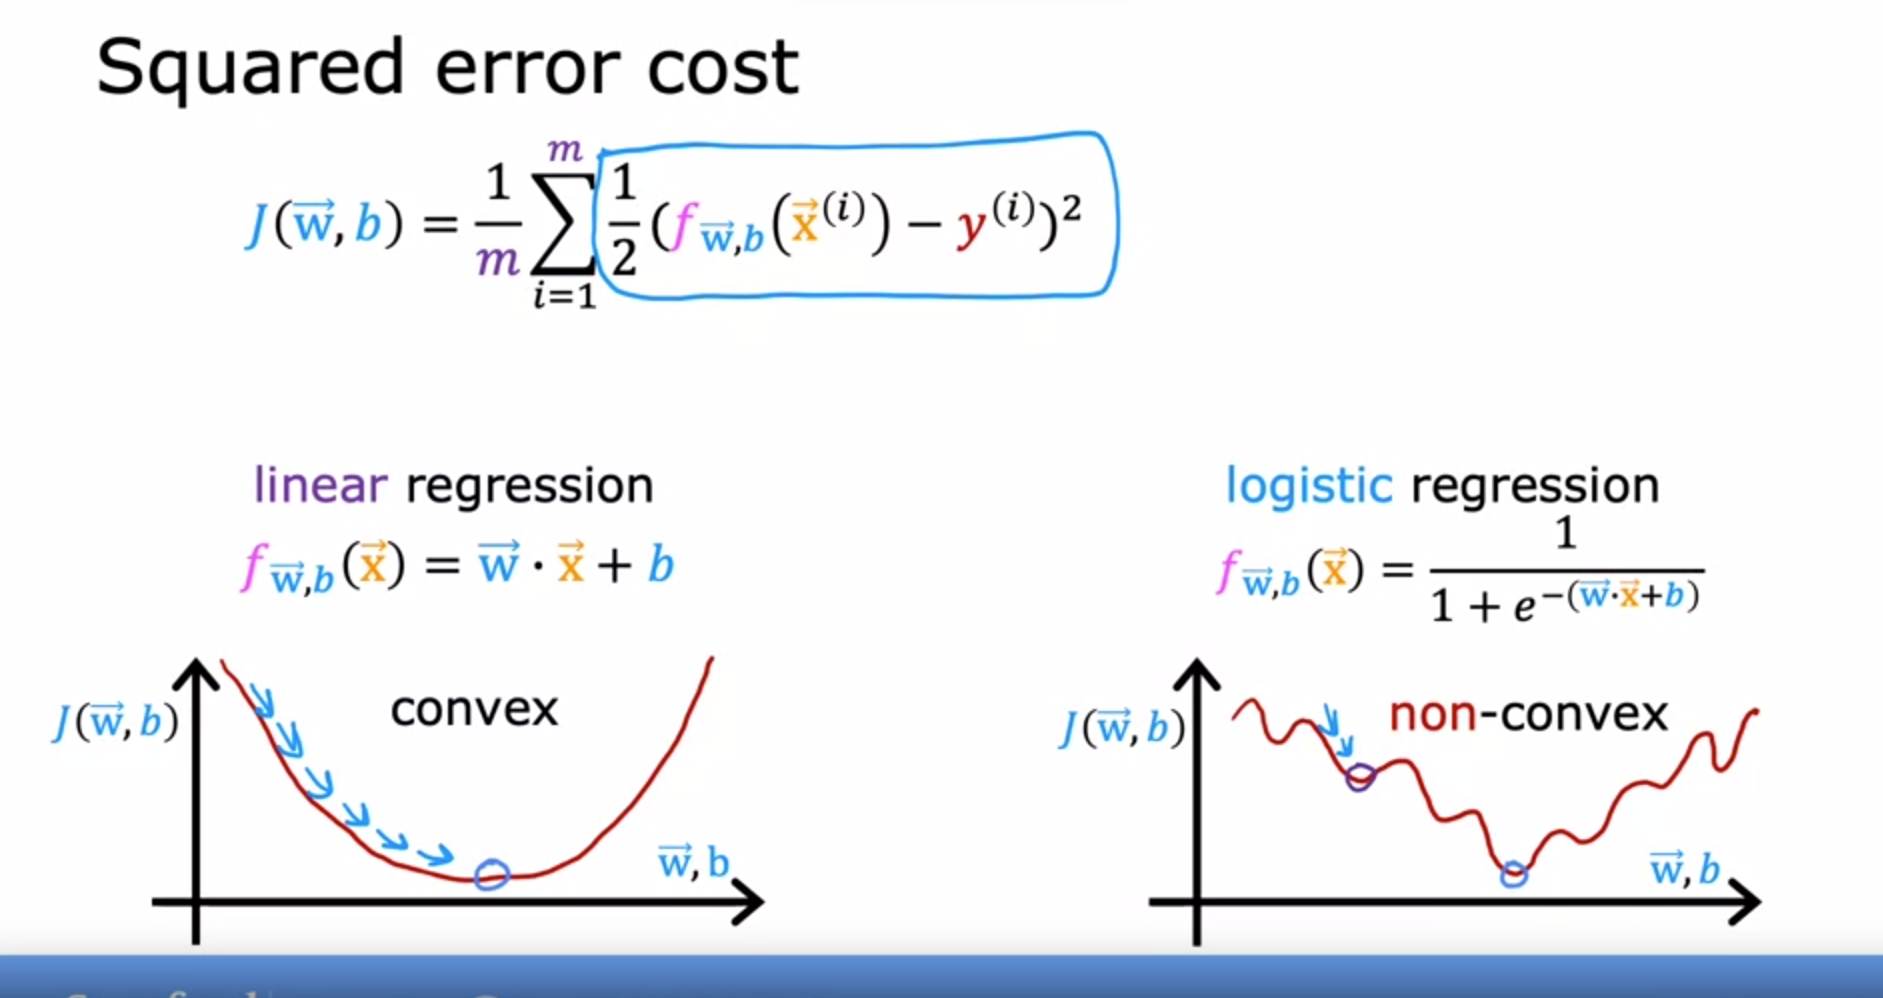

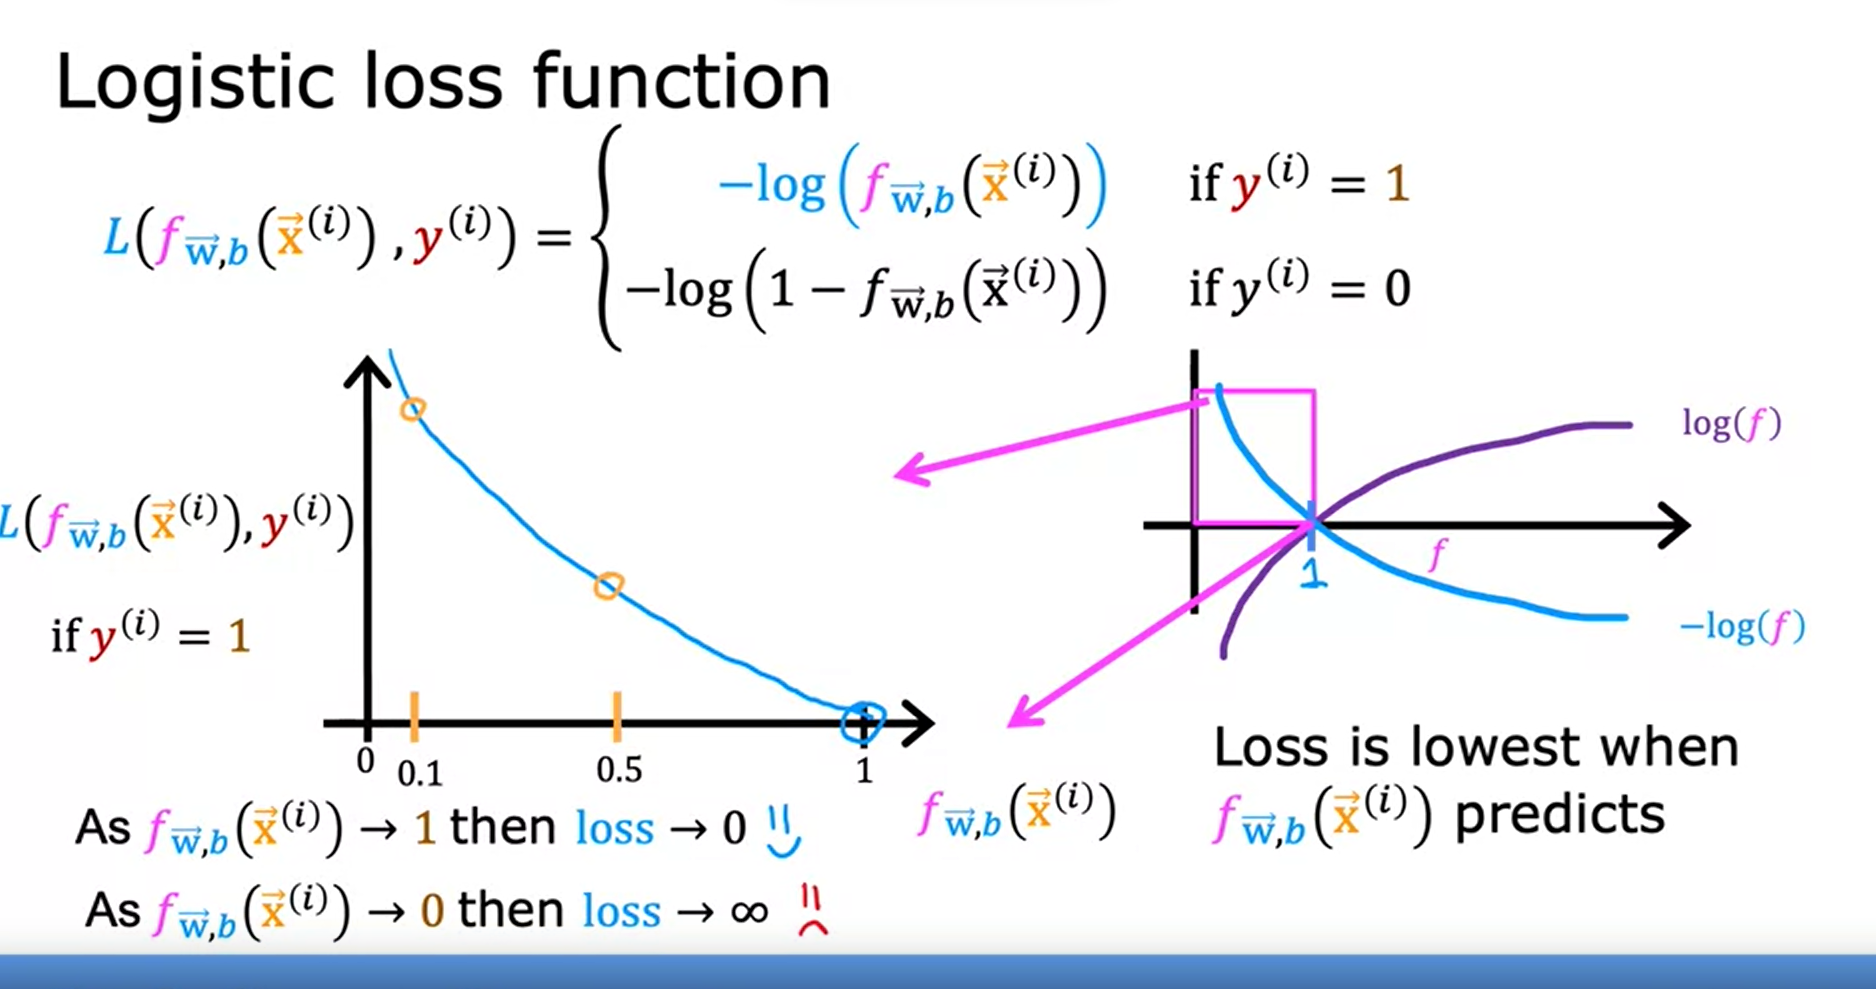![image.png](
  
)

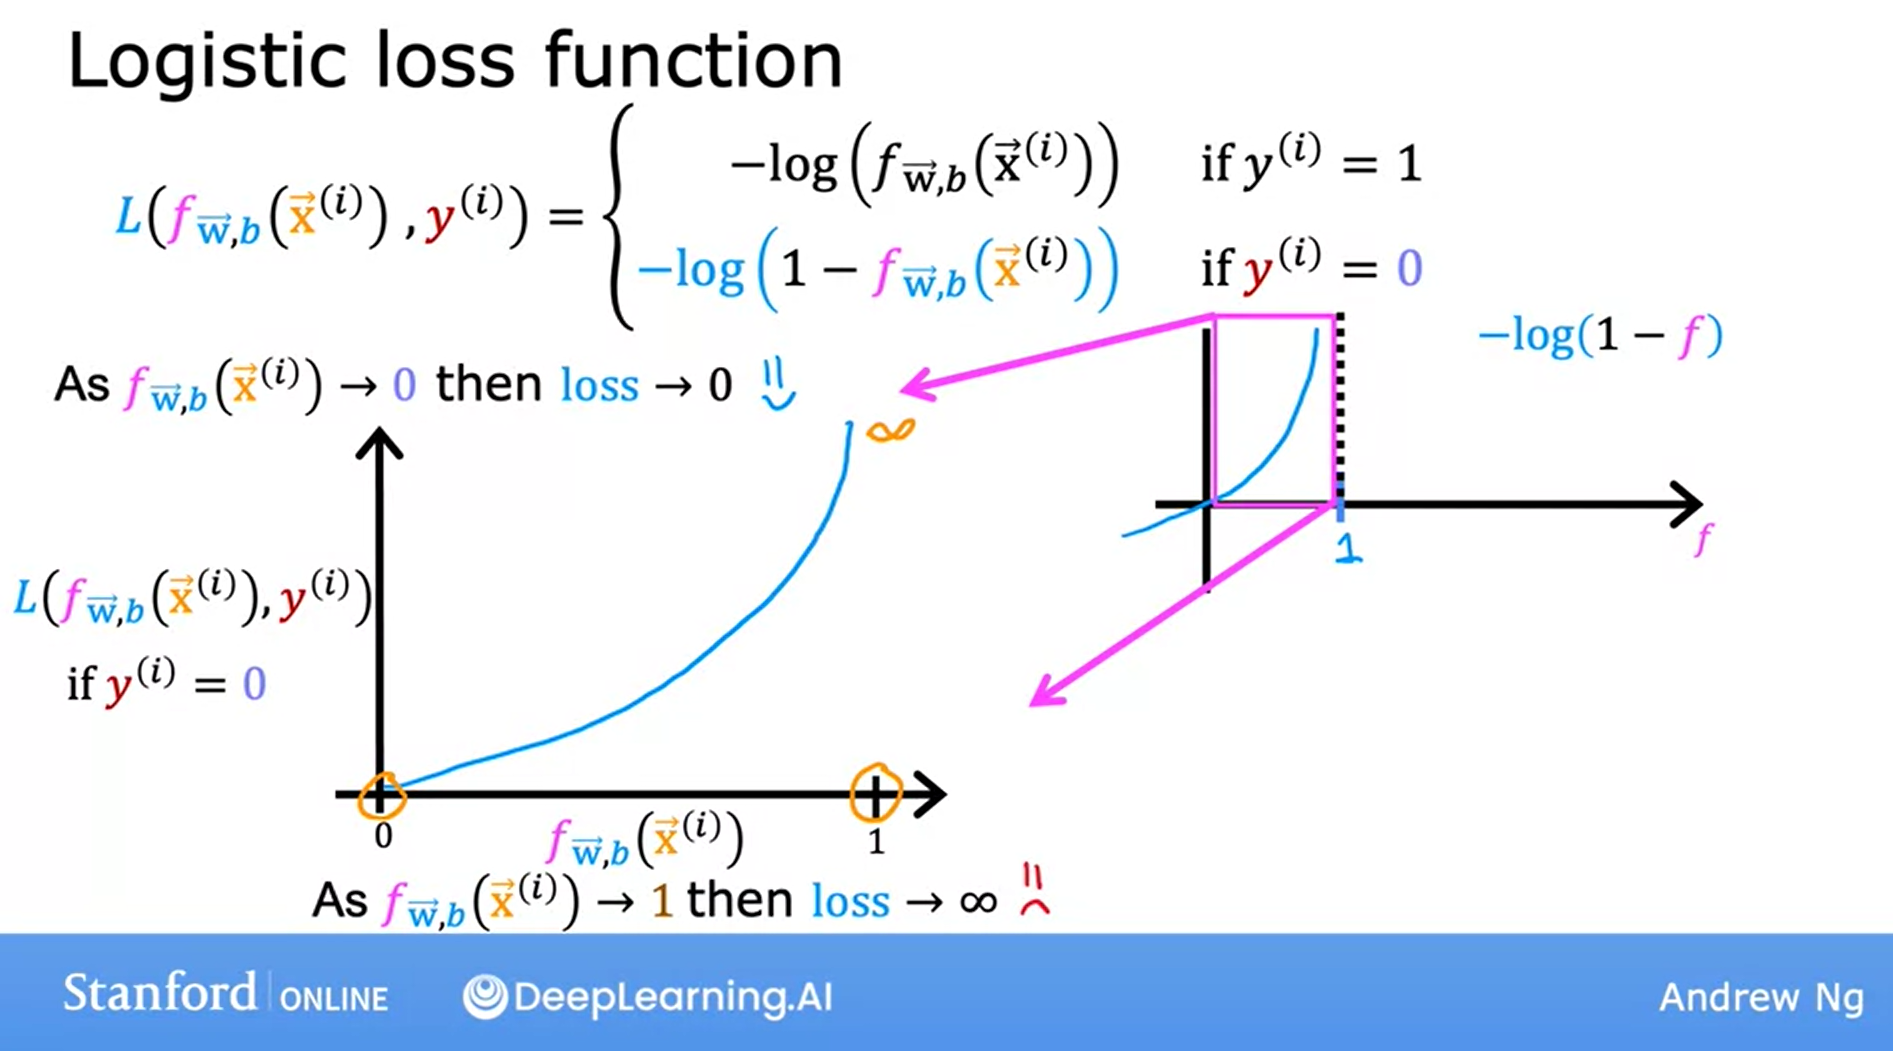

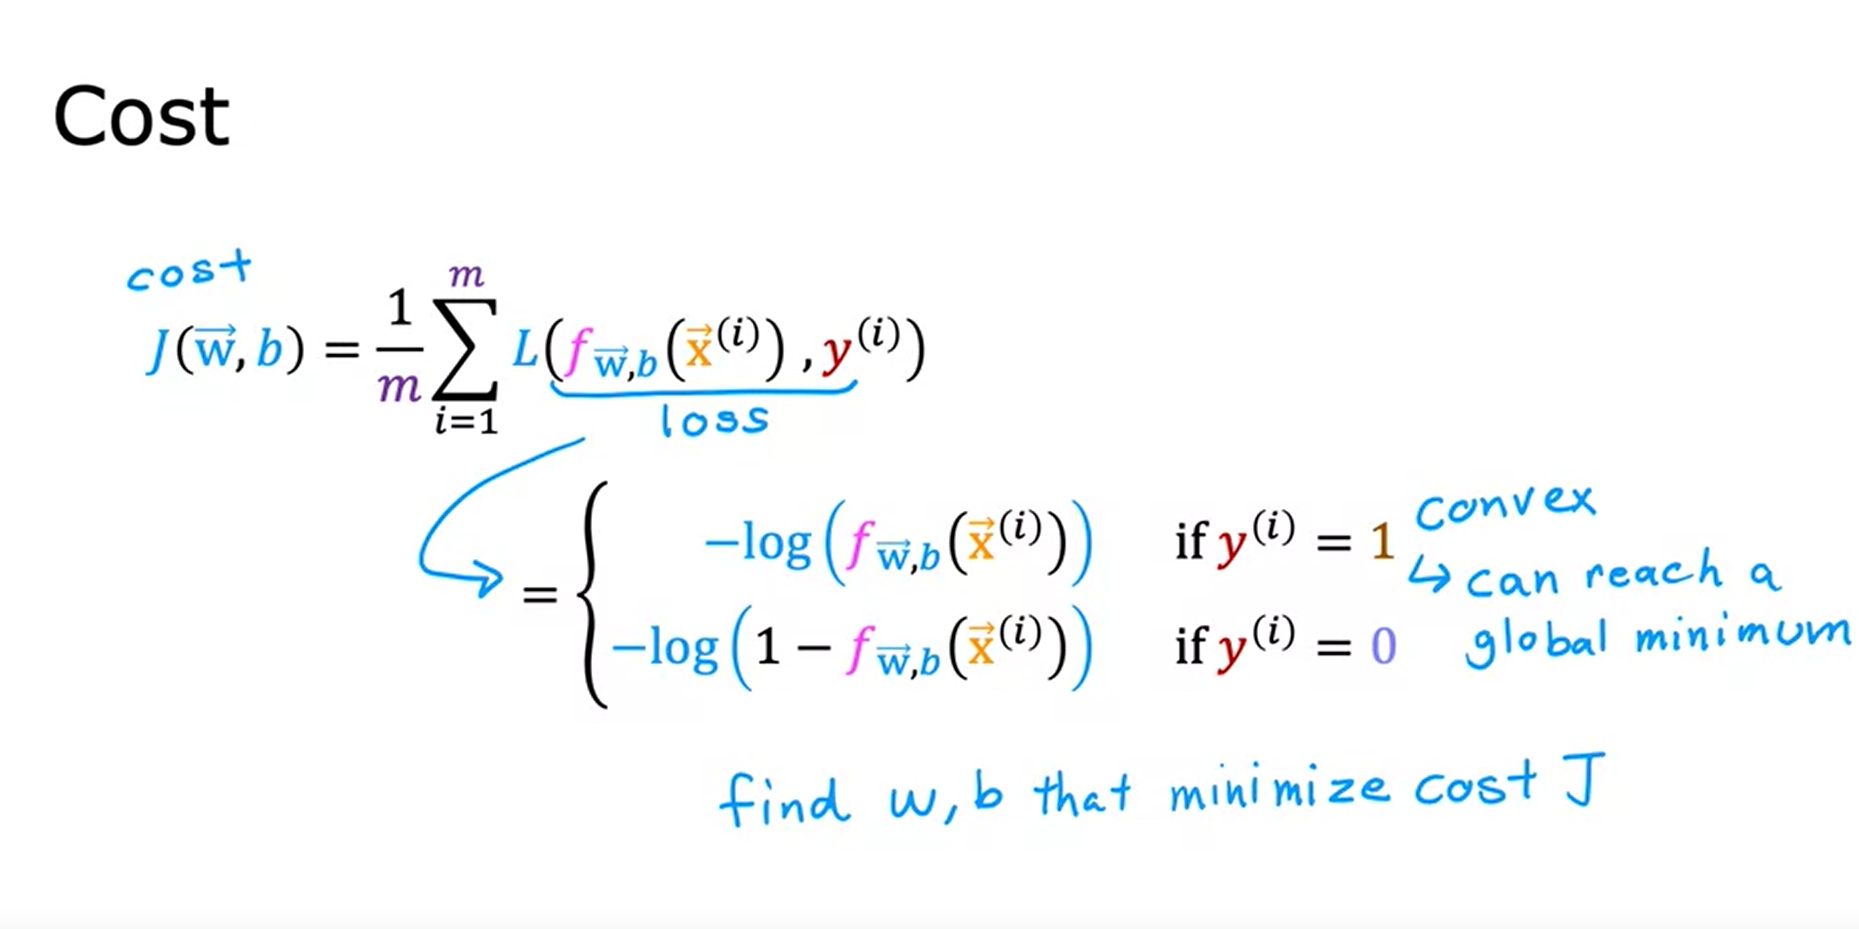

In [ ]:
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]

In [ ]:
"""----------------------------------------------------------------
 logistic_loss plotting routines and support
"""

from matplotlib import cm
#from lab_utils_common import sigmoid, dlblue, dlorange, np, plt, compute_cost_matrix

def compute_cost_logistic_sq_err(X, y, w, b):
    """
    compute sq error cost on logicist data (for negative example only, not used in practice)
    Args:
      X (ndarray): Shape (m,n) matrix of examples with multiple features
      w (ndarray): Shape (n)   parameters for prediction
      b (scalar):              parameter  for prediction
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)                 #add sigmoid to normal sq error cost for linear regression
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return np.squeeze(cost)

def plt_logistic_squared_error(X,y):
    """ plots logistic squared error for demonstration """
    wx, by = np.meshgrid(np.linspace(-6,12,50),
                         np.linspace(10, -20, 40))
    points = np.c_[wx.ravel(), by.ravel()]
    cost = np.zeros(points.shape[0])

    for i in range(points.shape[0]):
        w,b = points[i]
        cost[i] = compute_cost_logistic_sq_err(X.reshape(-1,1), y, w, b)
    cost = cost.reshape(wx.shape)

    fig = plt.figure()
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(wx, by, cost, alpha=0.6,cmap=cm.jet,)

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel("Cost", rotation=90, fontsize=16)
    ax.set_title('"Logistic" Squared Error Cost vs (w, b)')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


def plt_logistic_cost(X,y):
    """ plots logistic cost """
    wx, by = np.meshgrid(np.linspace(-6,12,50),
                         np.linspace(0, -20, 40))
    points = np.c_[wx.ravel(), by.ravel()]
    cost = np.zeros(points.shape[0],dtype=np.longdouble)

    for i in range(points.shape[0]):
        w,b = points[i]
        cost[i] = compute_cost_matrix(X.reshape(-1,1), y, w, b, logistic=True, safe=True)
    cost = cost.reshape(wx.shape)

    fig = plt.figure(figsize=(9,5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(wx, by, cost, alpha=0.6,cmap=cm.jet,)

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel("Cost", rotation=90, fontsize=16)
    ax.set_title('Logistic Cost vs (w, b)')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    ax = fig.add_subplot(1, 2, 2, projection='3d')

    ax.plot_surface(wx, by, np.log(cost), alpha=0.6,cmap=cm.jet,)

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel('\nlog(Cost)', fontsize=16)
    ax.set_title('log(Logistic Cost) vs (w, b)')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    plt.show()
    return cost


def soup_bowl():
    """ creates 3D quadratic error surface """
    #Create figure and plot with a 3D projection
    fig = plt.figure(figsize=(4,4))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    #Plot configuration
    ax = fig.add_subplot(111, projection='3d')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_rotate_label(False)
    ax.view_init(15, -120)

    #Useful linearspaces to give values to the parameters w and b
    w = np.linspace(-20, 20, 100)
    b = np.linspace(-20, 20, 100)

    #Get the z value for a bowl-shaped cost function
    z=np.zeros((len(w), len(b)))
    j=0
    for x in w:
        i=0
        for y in b:
            z[i,j] = x**2 + y**2
            i+=1
        j+=1

    #Meshgrid used for plotting 3D functions
    W, B = np.meshgrid(w, b)

    #Create the 3D surface plot of the bowl-shaped cost function
    ax.plot_surface(W, B, z, cmap = "Spectral_r", alpha=0.7, antialiased=False)
    ax.plot_wireframe(W, B, z, color='k', alpha=0.1)
    ax.set_xlabel("$w$")
    ax.set_ylabel("$b$")
    ax.set_zlabel("Cost", rotation=90)
    ax.set_title("Squared Error Cost used in Linear Regression")

    plt.show()


def plt_simple_example(x, y):
    """ plots tumor data """
    pos = y == 1
    neg = y == 0

    fig,ax = plt.subplots(1,1,figsize=(5,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    ax.scatter(x[pos], y[pos], marker='x', s=80, c = 'red', label="malignant")
    ax.scatter(x[neg], y[neg], marker='o', s=100, label="benign", facecolors='none', edgecolors=dlblue,lw=3)
    ax.set_ylim(-0.075,1.1)
    ax.set_ylabel('y')
    ax.set_xlabel('Tumor Size')
    ax.legend(loc='lower right')
    ax.set_title("Example of Logistic Regression on Categorical Data")


def plt_two_logistic_loss_curves():
    """ plots the logistic loss """
    fig,ax = plt.subplots(1,2,figsize=(6,3),sharey=True)
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    x = np.linspace(0.01,1-0.01,20)
    ax[0].plot(x,-np.log(x))
    #ax[0].set_title("y = 1")
    ax[0].text(0.5, 4.0, "y = 1", fontsize=12)
    ax[0].set_ylabel("loss")
    ax[0].set_xlabel(r"$f_{w,b}(x)$")
    ax[1].plot(x,-np.log(1-x))
    #ax[1].set_title("y = 0")
    ax[1].text(0.5, 4.0, "y = 0", fontsize=12)
    ax[1].set_xlabel(r"$f_{w,b}(x)$")
    ax[0].annotate("prediction \nmatches \ntarget ", xy= [1,0], xycoords='data',
                 xytext=[-10,30],textcoords='offset points', ha="right", va="center",
                   arrowprops={'arrowstyle': '->', 'color': dlorange, 'lw': 3},)
    ax[0].annotate("loss increases as prediction\n differs from target", xy= [0.1,-np.log(0.1)], xycoords='data',
                 xytext=[10,30],textcoords='offset points', ha="left", va="center",
                   arrowprops={'arrowstyle': '->', 'color': dlorange, 'lw': 3},)
    ax[1].annotate("prediction \nmatches \ntarget ", xy= [0,0], xycoords='data',
                 xytext=[10,30],textcoords='offset points', ha="left", va="center",
                   arrowprops={'arrowstyle': '->', 'color': dlorange, 'lw': 3},)
    ax[1].annotate("loss increases as prediction\n differs from target", xy= [0.9,-np.log(1-0.9)], xycoords='data',
                 xytext=[-10,30],textcoords='offset points', ha="right", va="center",
                   arrowprops={'arrowstyle': '->', 'color': dlorange, 'lw': 3},)
    plt.suptitle("Loss Curves for Two Categorical Target Values", fontsize=12)
    plt.tight_layout()
    plt.show()


## Dataset

Let's suppose you have following training dataset
- The input variable `X` is a numpy array which has 6 training examples, each with two features
- The output variable `y` is also a numpy array with 6 examples, and `y` is either `0` or `1`

In [ ]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

### Plot data 

Let's use a helper function to plot this data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as blue circles.

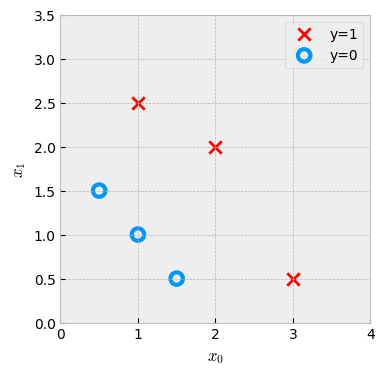

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X, y, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

## Logistic regression model


* Suppose you'd like to train a logistic regression model on this data which has the form   

  $f(x) = g(w_0x_0+w_1x_1 + b)$
  
  where $g(z) = \frac{1}{1+e^{-z}}$, which is the sigmoid function


* Let's say that you trained the model and get the parameters as $b = -3, w_0 = 1, w_1 = 1$. That is,

  $f(x) = g(x_0+x_1-3)$

  (You'll learn how to fit these parameters to the data further in the course)
  
  
Let's try to understand what this trained model is predicting by plotting its decision boundary

## Squared error for logistic regression?
<img align="left" src="./images/C1_W3_SqErrorVsLogistic.png"     style=" width:400px; padding: 10px; " > Recall for **Linear** Regression we have used the **squared error cost function**:
The equation for the squared error cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$


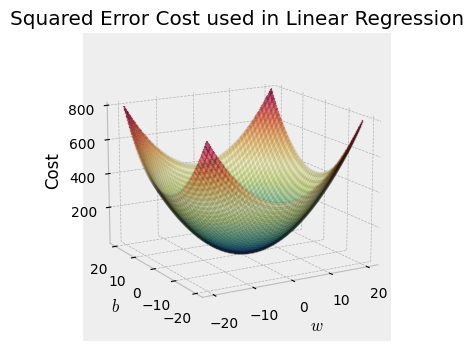

In [ ]:
soup_bowl()

This cost function worked well for linear regression, it is natural to consider it for logistic regression as well. However, as the slide above points out,  𝑓𝑤𝑏(𝑥)
  now has a non-linear component, the sigmoid function:  𝑓𝑤,𝑏(𝑥(𝑖))=𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑤𝑥(𝑖)+𝑏)
 . Let's try a squared error cost on the example from an earlier lab, now including the sigmoid.

Here is our training data:

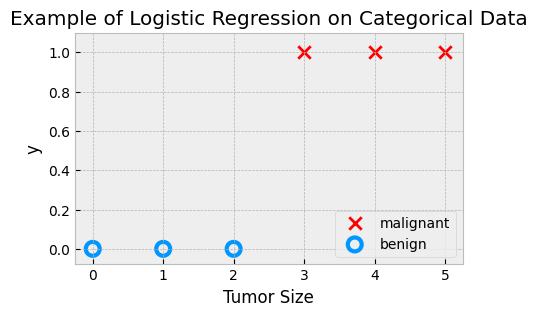

In [ ]:
x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)
plt_simple_example(x_train, y_train)

Now, let's get a surface plot of the cost using a *squared error cost*:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$ 
 
where 
  $$f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$$


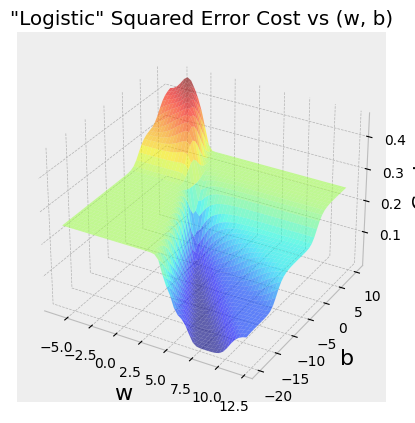

In [ ]:
plt.close('all')
plt_logistic_squared_error(x_train,y_train)
plt.show()

Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number. 

>**Definition Note:**   In this course, these definitions are used:  
**Loss** is a measure of the difference of a single example to its target value while the  
**Cost** is a measure of the losses over the training set


This is defined: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

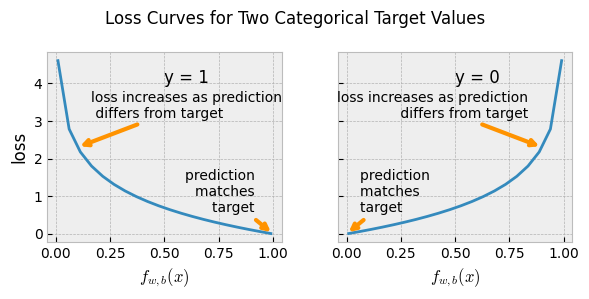

In [ ]:
plt_two_logistic_loss_curves()

In [ ]:
import inspect

In [ ]:
print(inspect.getsourcelines(plt_two_logistic_loss_curves))

(['def plt_two_logistic_loss_curves():\n', '    """ plots the logistic loss """\n', '    fig,ax = plt.subplots(1,2,figsize=(6,3),sharey=True)\n', '    fig.canvas.toolbar_visible = False\n', '    fig.canvas.header_visible = False\n', '    fig.canvas.footer_visible = False\n', '    x = np.linspace(0.01,1-0.01,20)\n', '    ax[0].plot(x,-np.log(x))\n', '    #ax[0].set_title("y = 1")\n', '    ax[0].text(0.5, 4.0, "y = 1", fontsize=12)\n', '    ax[0].set_ylabel("loss")\n', '    ax[0].set_xlabel(r"$f_{w,b}(x)$")\n', '    ax[1].plot(x,-np.log(1-x))\n', '    #ax[1].set_title("y = 0")\n', '    ax[1].text(0.5, 4.0, "y = 0", fontsize=12)\n', '    ax[1].set_xlabel(r"$f_{w,b}(x)$")\n', '    ax[0].annotate("prediction \\nmatches \\ntarget ", xy= [1,0], xycoords=\'data\',\n', '                 xytext=[-10,30],textcoords=\'offset points\', ha="right", va="center",\n', "                   arrowprops={'arrowstyle': '->', 'color': dlorange, 'lw': 3},)\n", '    ax[0].annotate("loss increases as prediction\

Combined, the curves are similar to the quadratic curve of the squared error loss. Note, the x-axis is  𝑓𝐰,𝑏
  which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.

The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
  
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

OK, with this new logistic loss function, a cost function can be produced that incorporates the loss from all the examples. This will be the topic of the next lab. For now, let's take a look at the cost vs parameters curve for the simple example we considered above:

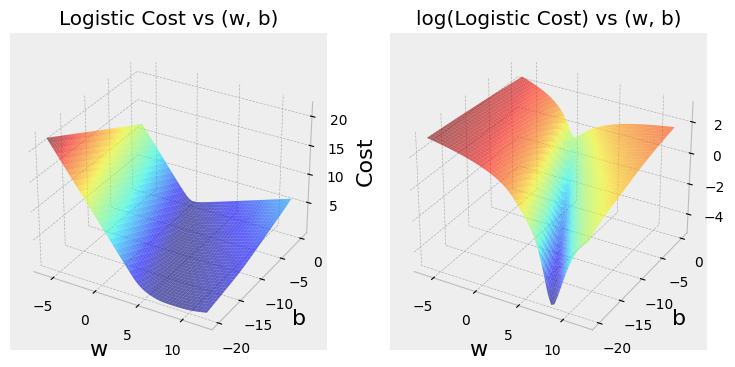

In [ ]:
plt.close('all')
cst = plt_logistic_cost(x_train,y_train)

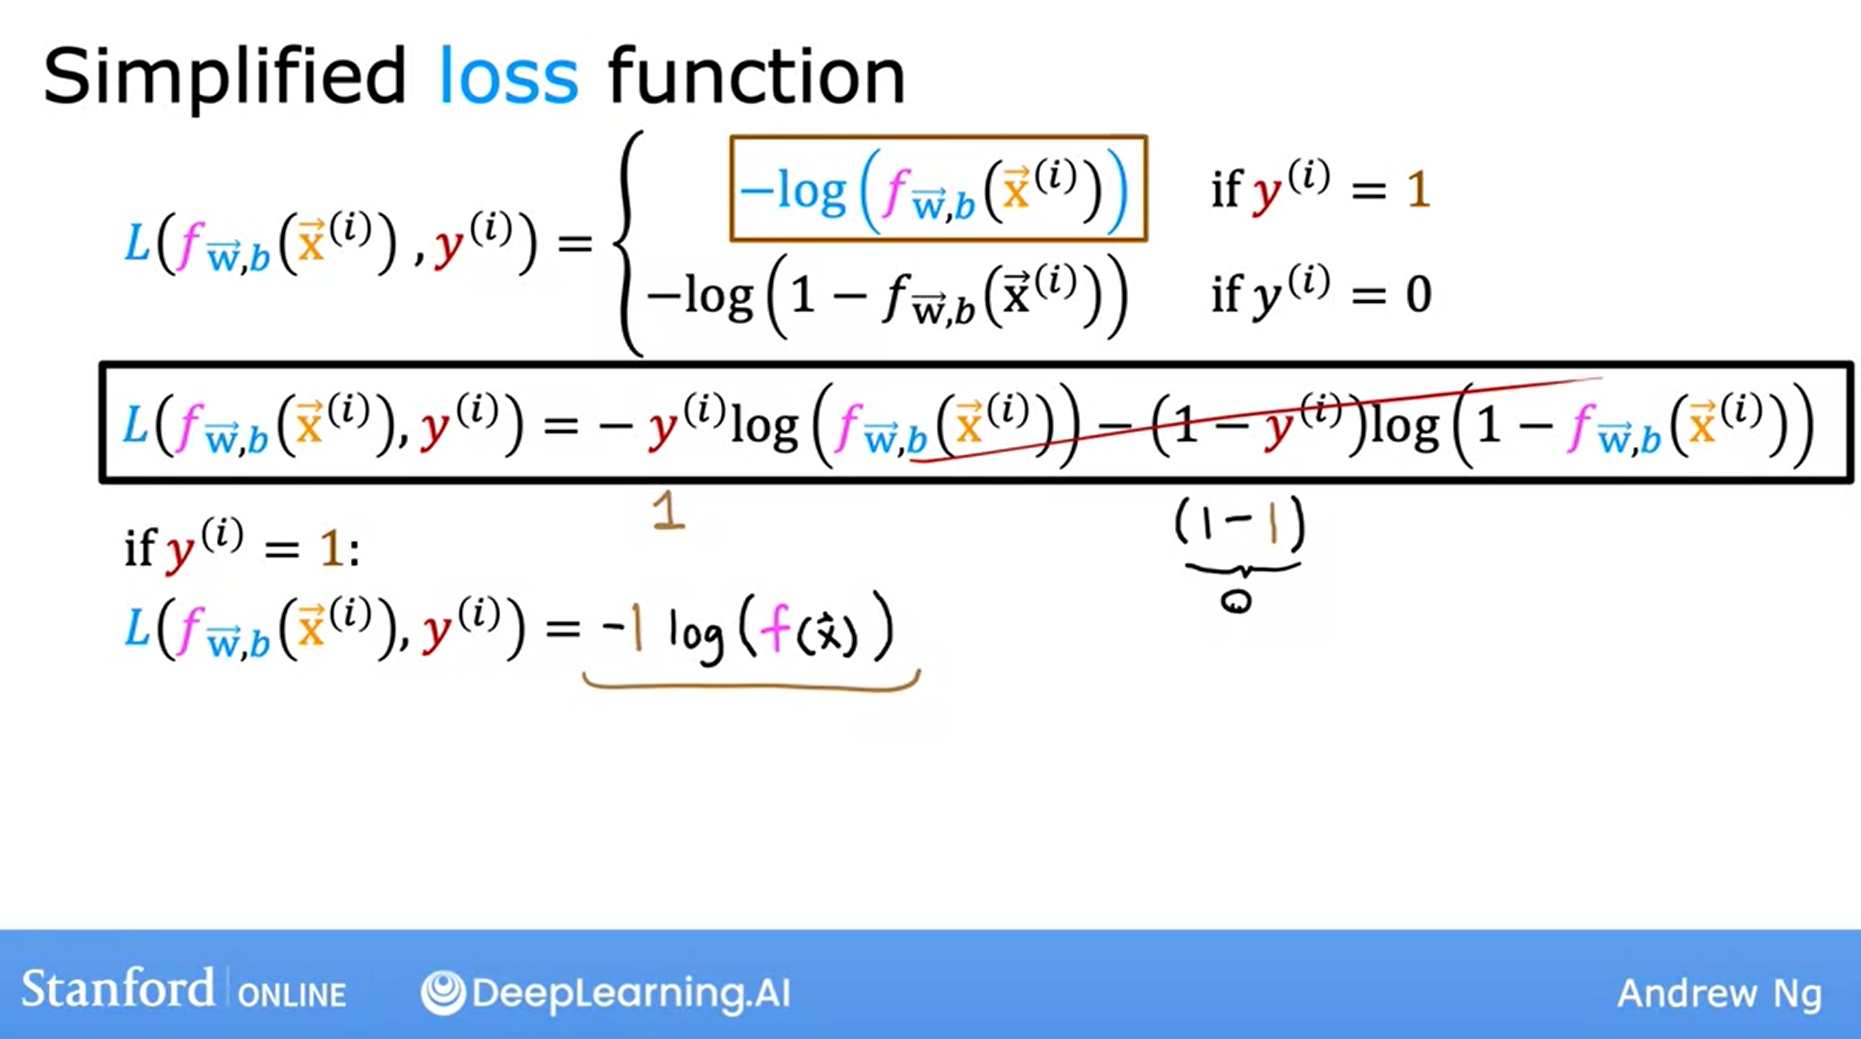

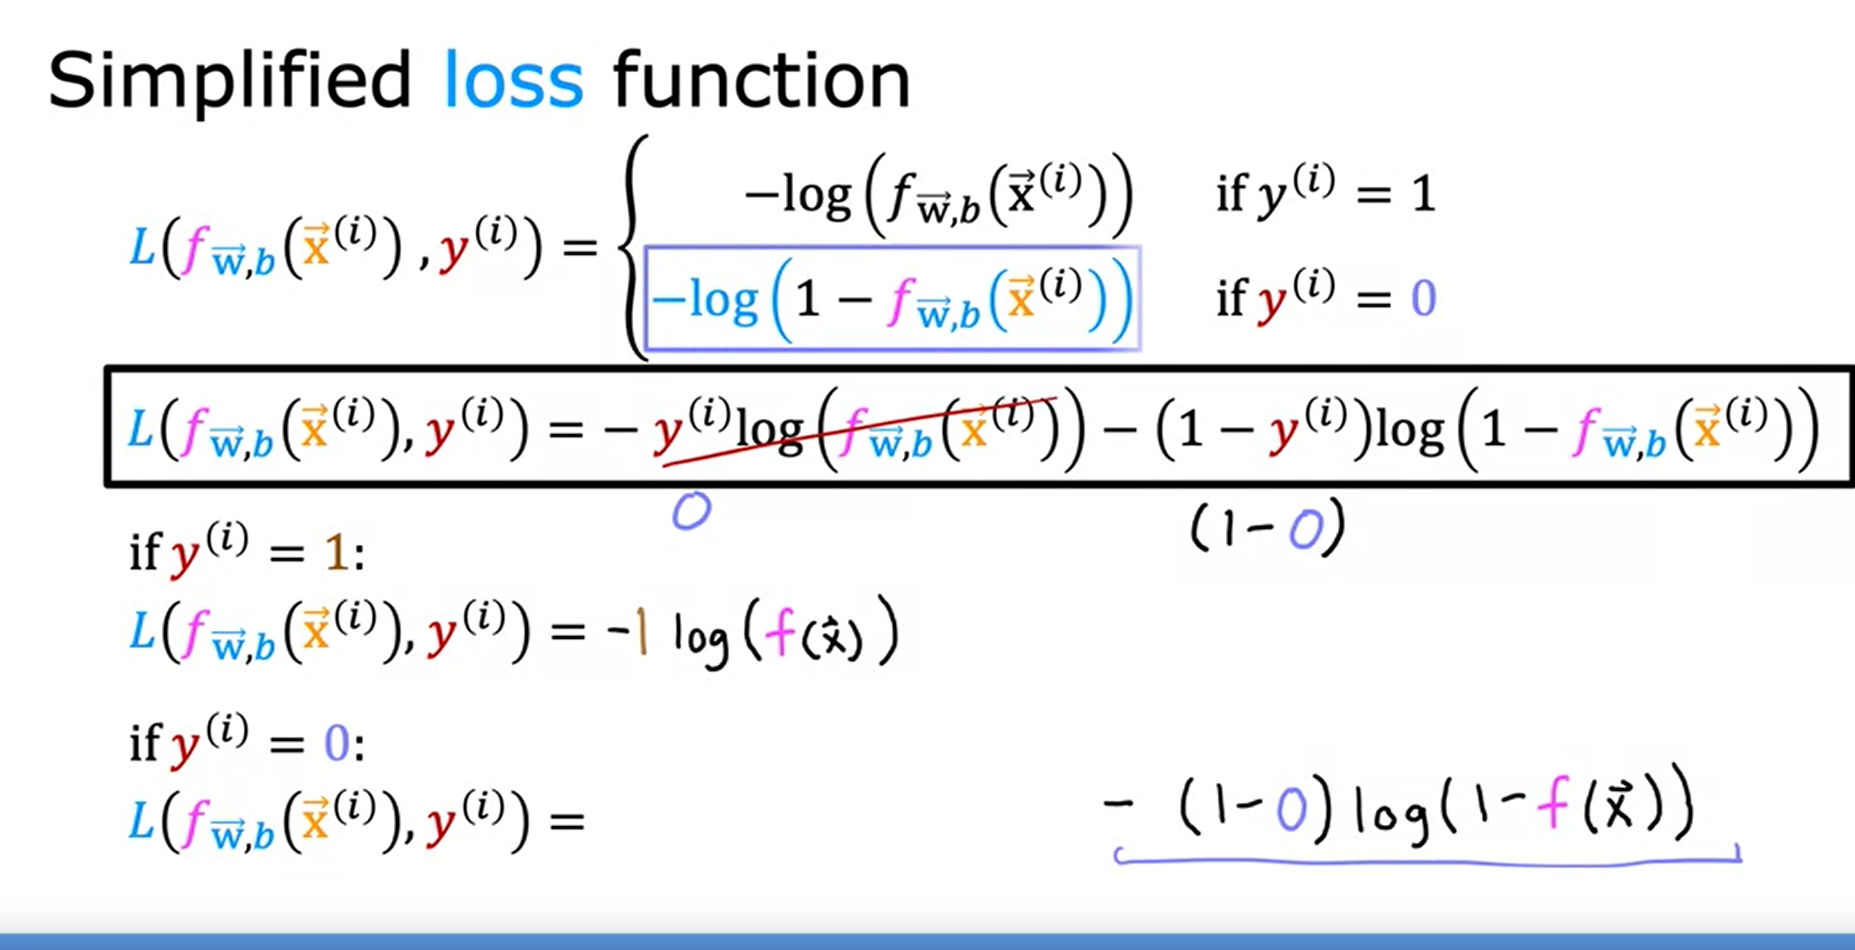

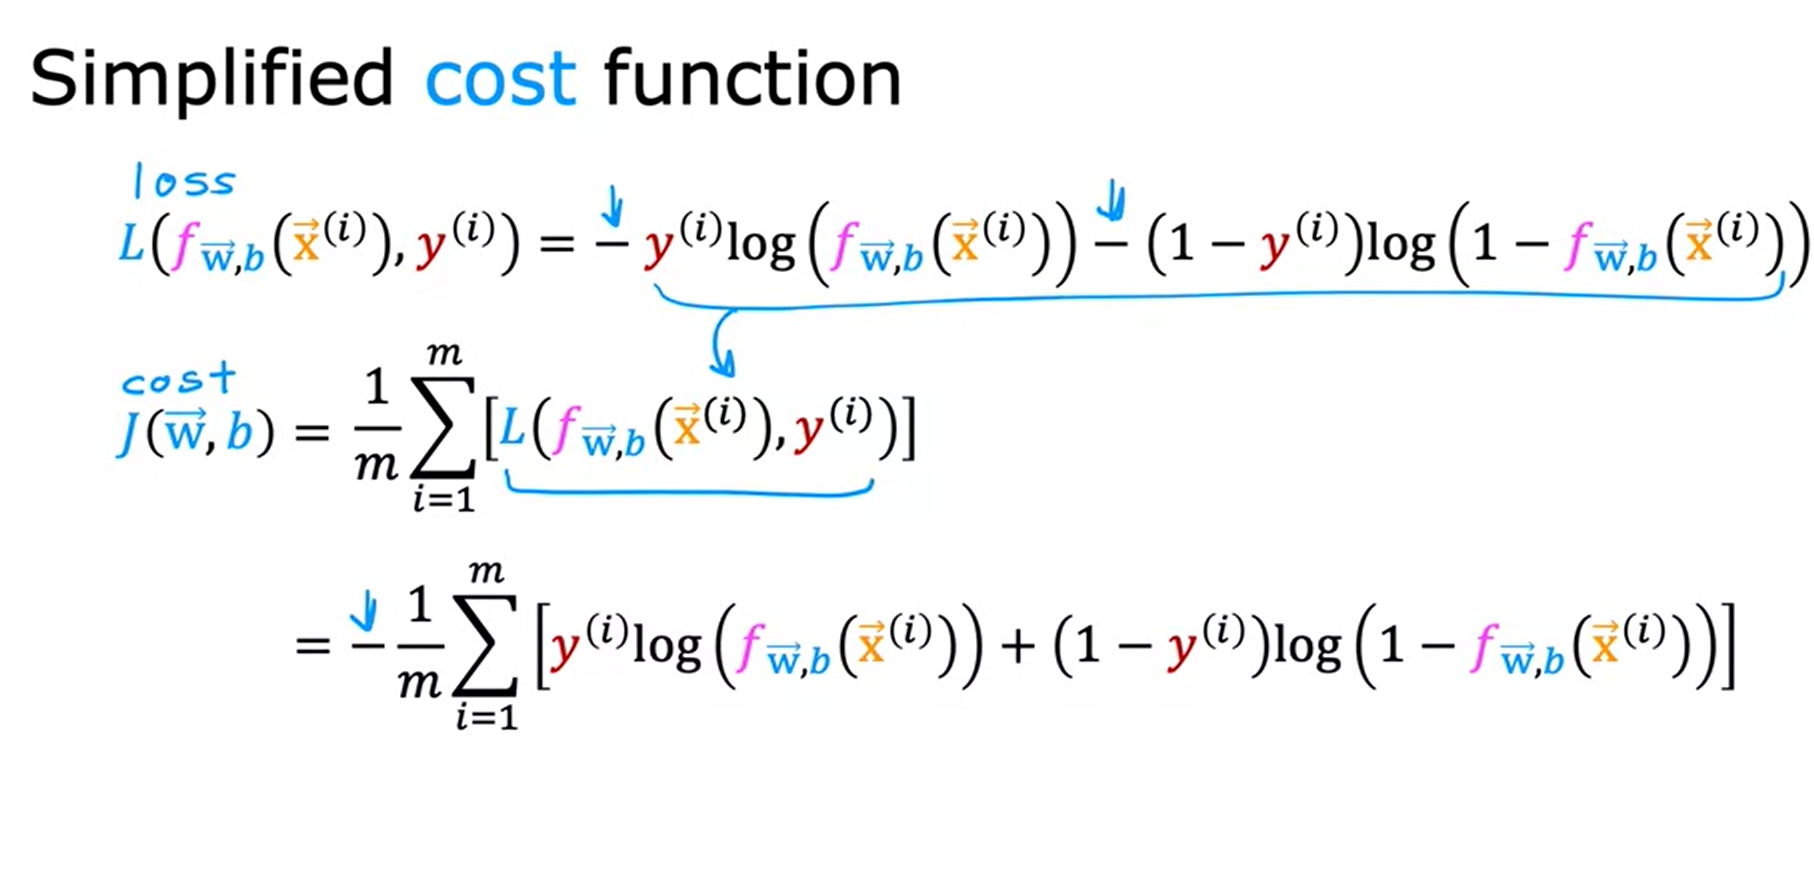

In [ ]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])   

We will use a helper function to plot this data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as blue circles

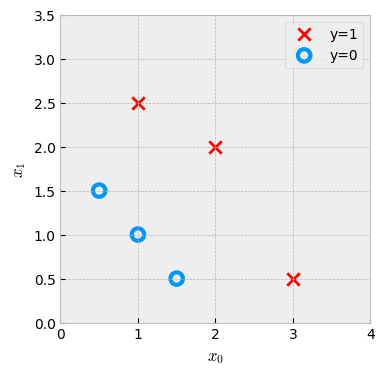

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$
 

In [ ]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


In [ ]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


## Example
Now, let's see what the cost function output is for a different value of $w$. 

* In a previous lab, you plotted the decision boundary for  $b = -3, w_0 = 1, w_1 = 1$. That is, you had `b = -3, w = np.array([1,1])`.

* Let's say you want to see if $b = -4, w_0 = 1, w_1 = 1$, or `b = -4, w = np.array([1,1])` provides a better model.

Let's first plot the decision boundary for these two different $b$ values to see which one fits the data better.

* For $b = -3, w_0 = 1, w_1 = 1$, we'll plot $-3 + x_0+x_1 = 0$ (shown in blue)
* For $b = -4, w_0 = 1, w_1 = 1$, we'll plot $-4 + x_0+x_1 = 0$ (shown in magenta)

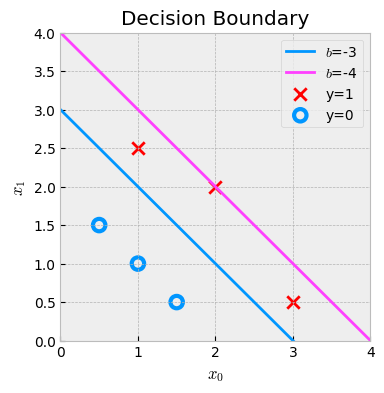

In [ ]:
import matplotlib.pyplot as plt

# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c=dlc["dlblue"], label="$b$=-3")
ax.plot(x0,x1_other, c=dlc["dlmagenta"], label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [ ]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


**Expected output**

Cost for b = -3 :  0.3668667864055175

Cost for b = -4 :  0.5036808636748461


You can see the cost function behaves as expected and the cost for `b = -4, w = np.array([1,1])` is indeed higher than the cost for `b = -3, w = np.array([1,1])`

In [ ]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


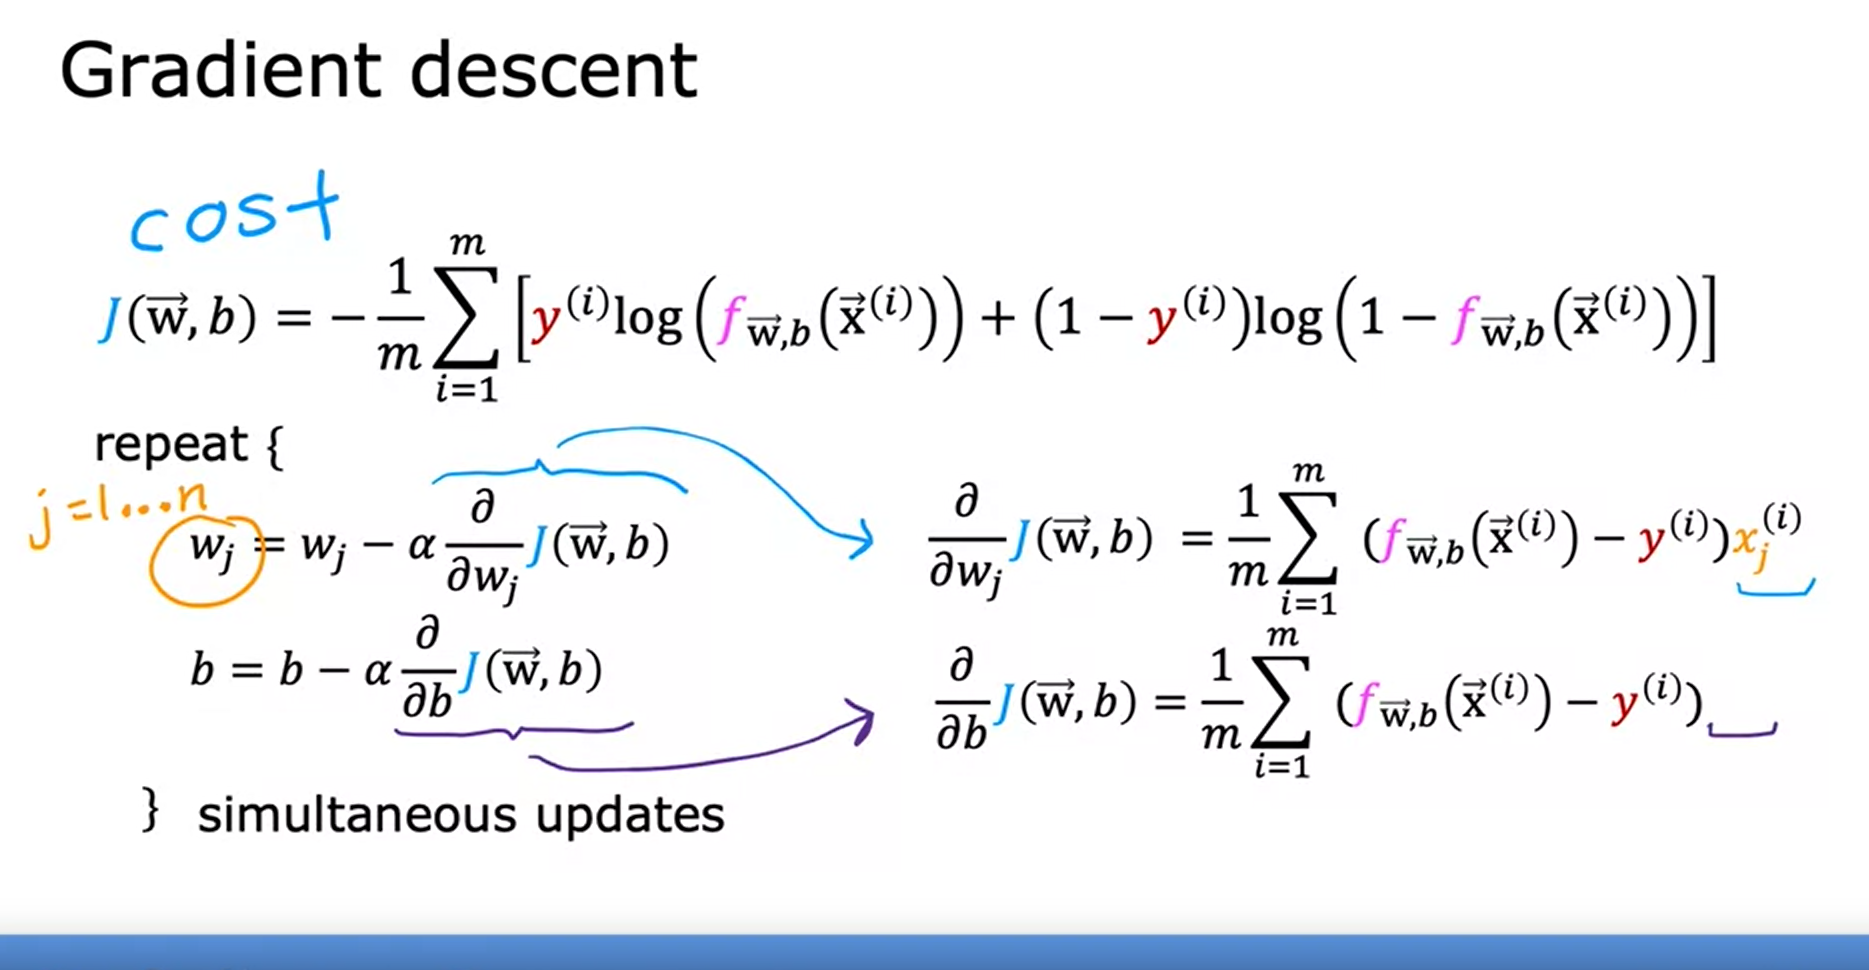

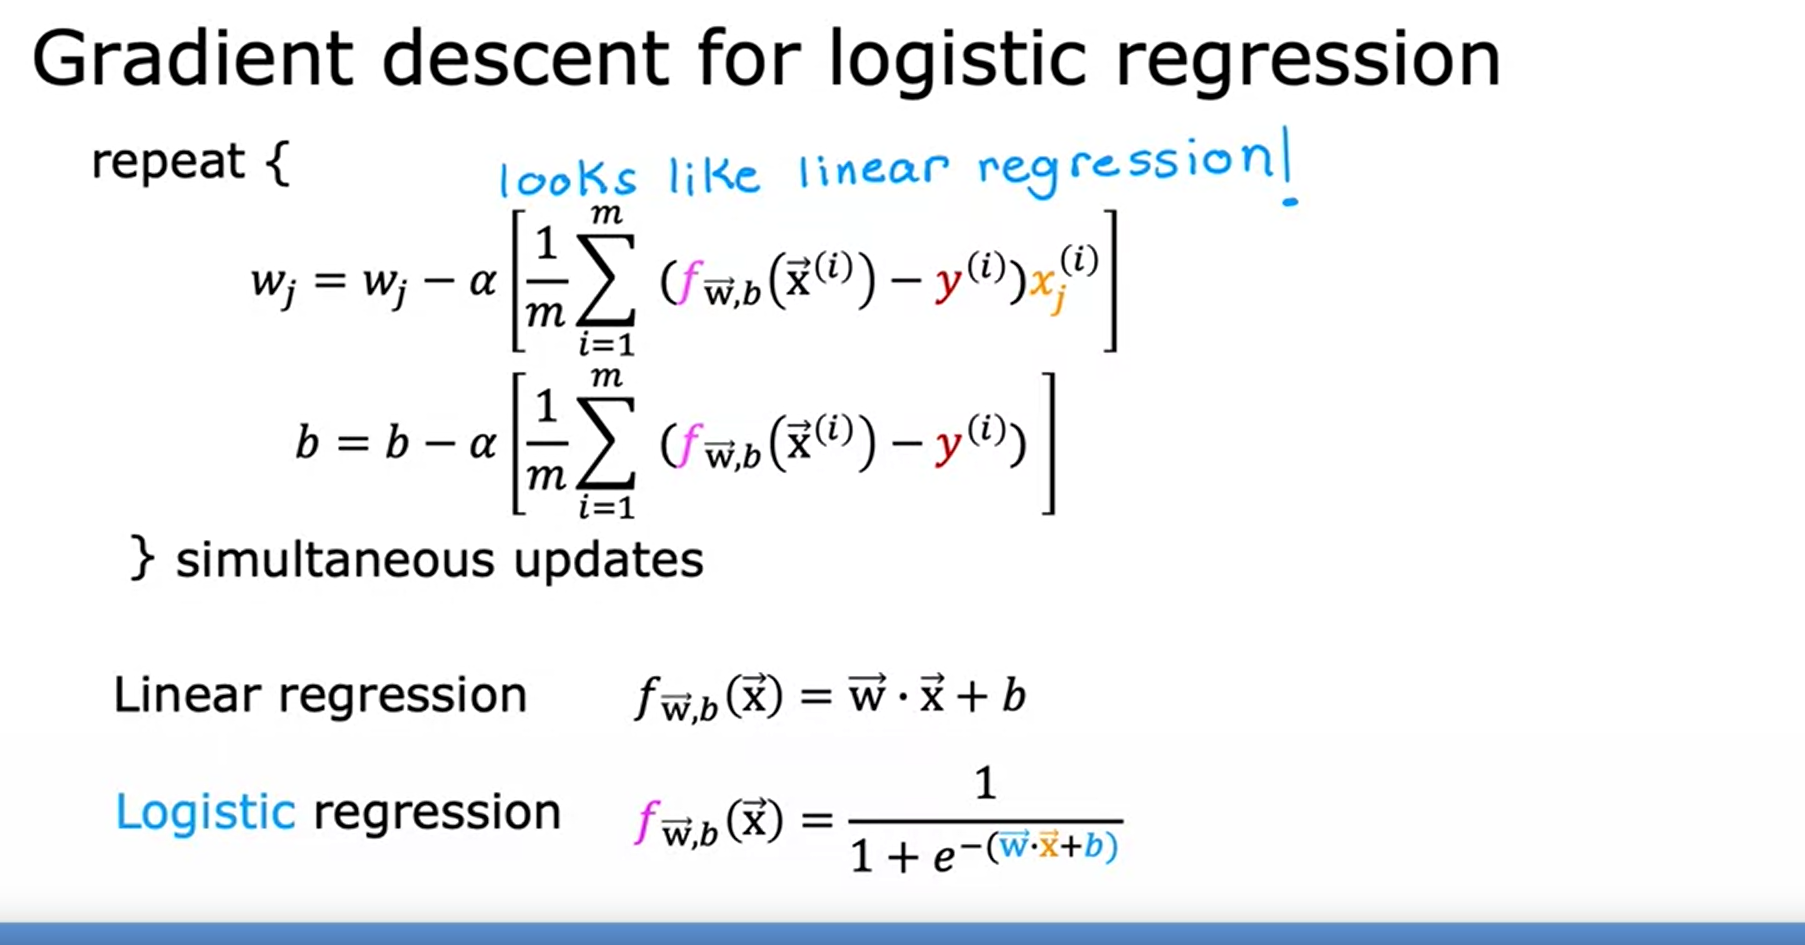

In [ ]:
def plt_tumor_data(x, y, ax):
    """ plots tumor data on one axis """
    pos = y == 1
    neg = y == 0

    ax.scatter(x[pos], y[pos], marker='x', s=80, c = 'red', label="malignant")
    ax.scatter(x[neg], y[neg], marker='o', s=100, label="benign", facecolors='none', edgecolors=dlblue,lw=3)
    ax.set_ylim(-0.175,1.1)
    ax.set_ylabel('y')
    ax.set_xlabel('Tumor Size')
    ax.set_title("Logistic Regression on Categorical Data")

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

In [ ]:
"""
plt_quad_logistic.py
    interactive plot and supporting routines showing logistic regression
"""

import time
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec
from matplotlib.widgets import Button
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output


In [ ]:
"""
plt_quad_logistic.py
    interactive plot and supporting routines showing logistic regression
"""

import time
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec
from matplotlib.widgets import Button
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output

# for debug
#output = Output() # sends hidden error messages to display when using widgets
#display(output)

class plt_quad_logistic:
    ''' plots a quad plot showing logistic regression '''
    # pylint: disable=too-many-instance-attributes
    # pylint: disable=too-many-locals
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self, x_train,y_train, w_range, b_range):
        # setup figure
        fig = plt.figure( figsize=(10,6))
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.set_facecolor('#ffffff') #white
        gs  = GridSpec(2, 2, figure=fig)
        ax0 = fig.add_subplot(gs[0, 0])
        ax1 = fig.add_subplot(gs[0, 1])
        ax2 = fig.add_subplot(gs[1, 0],  projection='3d')
        ax3 = fig.add_subplot(gs[1,1])
        pos = ax3.get_position().get_points()  ##[[lb_x,lb_y], [rt_x, rt_y]]
        h = 0.05 
        width = 0.2
        axcalc   = plt.axes([pos[1,0]-width, pos[1,1]-h, width, h])  #lx,by,w,h
        ax = np.array([ax0, ax1, ax2, ax3, axcalc])
        self.fig = fig
        self.ax = ax
        self.x_train = x_train
        self.y_train = y_train

        self.w = 0. #initial point, non-array
        self.b = 0.

        # initialize subplots
        self.dplot = data_plot(ax[0], x_train, y_train, self.w, self.b)
        self.con_plot = contour_and_surface_plot(ax[1], ax[2], x_train, y_train, w_range, b_range, self.w, self.b)
        self.cplot = cost_plot(ax[3])

        # setup events
        self.cid = fig.canvas.mpl_connect('button_press_event', self.click_contour)
        self.bcalc = Button(axcalc, 'Run Gradient Descent \nfrom current w,b (click)', color=dlc["dlorange"])
        self.bcalc.on_clicked(self.calc_logistic)

#    @output.capture()  # debug
    def click_contour(self, event):
        ''' called when click in contour '''
        if event.inaxes == self.ax[1]:   #contour plot
            self.w = event.xdata
            self.b = event.ydata

            self.cplot.re_init()
            self.dplot.update(self.w, self.b)
            self.con_plot.update_contour_wb_lines(self.w, self.b)
            self.con_plot.path.re_init(self.w, self.b)

            self.fig.canvas.draw()

#    @output.capture()  # debug
    def calc_logistic(self, event):
        ''' called on run gradient event '''
        for it in [1, 8,16,32,64,128,256,512,1024,2048,4096]:
            w, self.b, J_hist = gradient_descent(self.x_train.reshape(-1,1), self.y_train.reshape(-1,1),
                                                 np.array(self.w).reshape(-1,1), self.b, 0.1, it,
                                                 logistic=True, lambda_=0, verbose=False)
            self.w = w[0,0]
            self.dplot.update(self.w, self.b)
            self.con_plot.update_contour_wb_lines(self.w, self.b)
            self.con_plot.path.add_path_item(self.w,self.b)
            self.cplot.add_cost(J_hist)

            time.sleep(0.3)
            self.fig.canvas.draw()


class data_plot:
    ''' handles data plot '''
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self, ax, x_train, y_train, w, b):
        self.ax = ax
        self.x_train = x_train
        self.y_train = y_train
        self.m = x_train.shape[0]
        self.w = w
        self.b = b

        self.plt_tumor_data()
        self.draw_logistic_lines(firsttime=True)
        self.mk_cost_lines(firsttime=True)

        self.ax.autoscale(enable=False) # leave plot scales the same after initial setup

    def plt_tumor_data(self):
        x = self.x_train
        y = self.y_train
        pos = y == 1
        neg = y == 0
        self.ax.scatter(x[pos], y[pos], marker='x', s=80, c = 'red', label="malignant")
        self.ax.scatter(x[neg], y[neg], marker='o', s=100, label="benign", facecolors='none',
                   edgecolors=dlc["dlblue"],lw=3)
        self.ax.set_ylim(-0.175,1.1)
        self.ax.set_ylabel('y')
        self.ax.set_xlabel('Tumor Size')
        self.ax.set_title("Logistic Regression on Categorical Data")

    def update(self, w, b):
        self.w = w
        self.b = b
        self.draw_logistic_lines()
        self.mk_cost_lines()

    def draw_logistic_lines(self, firsttime=False):
        if not firsttime:
            self.aline[0].remove()
            self.bline[0].remove()
            self.alegend.remove()

        xlim  = self.ax.get_xlim()
        x_hat = np.linspace(*xlim, 30)
        y_hat = sigmoid(np.dot(x_hat.reshape(-1,1), self.w) + self.b)
        self.aline = self.ax.plot(x_hat, y_hat, color=dlc["dlblue"],
                                     label="y = sigmoid(z)")
        f_wb = np.dot(x_hat.reshape(-1,1), self.w) + self.b
        self.bline = self.ax.plot(x_hat, f_wb, color=dlc["dlorange"], lw=1,
                                     label=f"z = {np.squeeze(self.w):0.2f}x+({self.b:0.2f})")
        self.alegend = self.ax.legend(loc='upper left')

    def mk_cost_lines(self, firsttime=False):
        ''' makes vertical cost lines'''
        if not firsttime:
            for artist in self.cost_items:
                artist.remove()
        self.cost_items = []
        cstr = f"cost = (1/{self.m})*("
        ctot = 0
        label = 'cost for point'
        addedbreak = False
        for p in zip(self.x_train,self.y_train):
            f_wb_p = sigmoid(self.w*p[0]+self.b)
            c_p = compute_cost_matrix(p[0].reshape(-1,1), p[1],np.array(self.w), self.b, logistic=True, lambda_=0, safe=True)
            c_p_txt = c_p
            a = self.ax.vlines(p[0], p[1],f_wb_p, lw=3, color=dlc["dlpurple"], ls='dotted', label=label)
            label='' #just one
            cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
            b = self.ax.annotate(f'{c_p_txt:0.1f}', xy=cxy, xycoords='data',color=dlc["dlpurple"],
                        xytext=(5, 0), textcoords='offset points')
            cstr += f"{c_p_txt:0.1f} +"
            if len(cstr) > 38 and addedbreak is False:
                cstr += "\n"
                addedbreak = True
            ctot += c_p
            self.cost_items.extend((a,b))
        ctot = ctot/(len(self.x_train))
        cstr = cstr[:-1] + f") = {ctot:0.2f}"
        ## todo.. figure out how to get this textbox to extend to the width of the subplot
        c = self.ax.text(0.05,0.02,cstr, transform=self.ax.transAxes, color=dlc["dlpurple"])
        self.cost_items.append(c)


class contour_and_surface_plot:
    ''' plots combined in class as they have similar operations '''
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self, axc, axs, x_train, y_train, w_range, b_range, w, b):

        self.x_train = x_train
        self.y_train = y_train
        self.axc = axc
        self.axs = axs

        #setup useful ranges and common linspaces
        b_space  = np.linspace(*b_range, 100)
        w_space  = np.linspace(*w_range, 100)

        # get cost for w,b ranges for contour and 3D
        tmp_b,tmp_w = np.meshgrid(b_space,w_space)
        z = np.zeros_like(tmp_b)
        for i in range(tmp_w.shape[0]):
            for j in range(tmp_w.shape[1]):
                z[i,j] = compute_cost_matrix(x_train.reshape(-1,1), y_train, tmp_w[i,j], tmp_b[i,j],
                                             logistic=True, lambda_=0, safe=True)
                if z[i,j] == 0:
                    z[i,j] = 1e-9

        ### plot contour ###
        CS = axc.contour(tmp_w, tmp_b, np.log(z),levels=12, linewidths=2, alpha=0.7,colors=dlcolors)
        axc.set_title('log(Cost(w,b))')
        axc.set_xlabel('w', fontsize=10)
        axc.set_ylabel('b', fontsize=10)
        axc.set_xlim(w_range)
        axc.set_ylim(b_range)
        self.update_contour_wb_lines(w, b, firsttime=True)
        axc.text(0.7,0.05,"Click to choose w,b",  bbox=dict(facecolor='white', ec = 'black'), fontsize = 10,
                transform=axc.transAxes, verticalalignment = 'center', horizontalalignment= 'center')

        #Surface plot of the cost function J(w,b)
        axs.plot_surface(tmp_w, tmp_b, z,  cmap = cm.jet, alpha=0.3, antialiased=True)
        axs.plot_wireframe(tmp_w, tmp_b, z, color='k', alpha=0.1)
        axs.set_xlabel("$w$")
        axs.set_ylabel("$b$")
        axs.zaxis.set_rotate_label(False)
        axs.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        axs.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        axs.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        axs.set_zlabel("J(w, b)", rotation=90)
        axs.view_init(30, -120)

        axs.autoscale(enable=False)
        axc.autoscale(enable=False)

        self.path = path(self.w,self.b, self.axc)  # initialize an empty path, avoids existance check

    def update_contour_wb_lines(self, w, b, firsttime=False):
        self.w = w
        self.b = b
        cst = compute_cost_matrix(self.x_train.reshape(-1,1), self.y_train, np.array(self.w), self.b,
                                  logistic=True, lambda_=0, safe=True)

        # remove lines and re-add on contour plot and 3d plot
        if not firsttime:
            for artist in self.dyn_items:
                artist.remove()
        a = self.axc.scatter(self.w, self.b, s=100, color=dlc["dlblue"], zorder= 10, label="cost with \ncurrent w,b")
        b = self.axc.hlines(self.b, self.axc.get_xlim()[0], self.w, lw=4, color=dlc["dlpurple"], ls='dotted')
        c = self.axc.vlines(self.w, self.axc.get_ylim()[0] ,self.b, lw=4, color=dlc["dlpurple"], ls='dotted')
        d = self.axc.annotate(f"Cost: {cst:0.2f}", xy= (self.w, self.b), xytext = (4,4), textcoords = 'offset points',
                           bbox=dict(facecolor='white'), size = 10)
        #Add point in 3D surface plot
        e = self.axs.scatter3D(self.w, self.b, cst , marker='X', s=100)

        self.dyn_items = [a,b,c,d,e]


class cost_plot:
    """ manages cost plot for plt_quad_logistic """
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self,ax):
        self.ax = ax
        self.ax.set_ylabel("log(cost)")
        self.ax.set_xlabel("iteration")
        self.costs = []
        self.cline = self.ax.plot(0,0, color=dlc["dlblue"])

    def re_init(self):
        self.ax.clear()
        self.__init__(self.ax)

    def add_cost(self,J_hist):
        self.costs.extend(J_hist)
        self.cline[0].remove()
        self.cline = self.ax.plot(self.costs)

class path:
    ''' tracks paths during gradient descent on contour plot '''
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self, w, b, ax):
        ''' w, b at start of path '''
        self.path_items = []
        self.w = w
        self.b = b
        self.ax = ax

    def re_init(self, w, b):
        for artist in self.path_items:
            artist.remove()
        self.path_items = []
        self.w = w
        self.b = b

    def add_path_item(self, w, b):
        a = FancyArrowPatch(
            posA=(self.w, self.b), posB=(w, b), color=dlc["dlblue"],
            arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
        )
        self.ax.add_artist(a)
        self.path_items.append(a)
        self.w = w
        self.b = b

#-----------
# related to the logistic gradient descent lab
#----------

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """ truncates color map """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def plt_prob(ax, w_out,b_out):
    """ plots a decision boundary but include shading to indicate the probability """
    #setup useful ranges and common linspaces
    x0_space  = np.linspace(0, 4 , 100)
    x1_space  = np.linspace(0, 4 , 100)

    # get probability for x0,x1 ranges
    tmp_x0,tmp_x1 = np.meshgrid(x0_space,x1_space)
    z = np.zeros_like(tmp_x0)
    for i in range(tmp_x0.shape[0]):
        for j in range(tmp_x1.shape[1]):
            z[i,j] = sigmoid(np.dot(w_out, np.array([tmp_x0[i,j],tmp_x1[i,j]])) + b_out)


    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.0, 0.5)
    pcm = ax.pcolormesh(tmp_x0, tmp_x1, z,
                   norm=cm.colors.Normalize(vmin=0, vmax=1),
                   cmap=new_cmap, shading='nearest', alpha = 0.9)
    ax.figure.colorbar(pcm, ax=ax)


## Data set 
Let's start with the same two feature data set used in the decision boundary lab.

In [ ]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

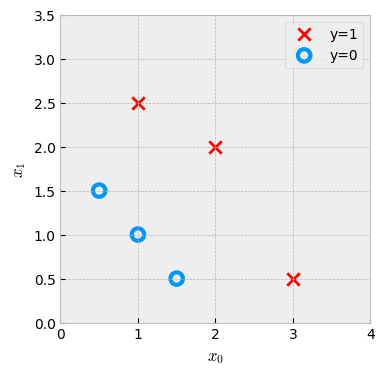

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## Logistic Gradient Descent


Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    

### Gradient Descent Implementation
The gradient descent algorithm implementation has two components: 
- The loop implementing equation (1) above. This is `gradient_descent` below and is generally provided to you in optional and practice labs.
- The calculation of the current gradient, equations (2,3) above. This is `compute_gradient_logistic` below. You will be asked to implement this week's practice lab.

#### Calculating the Gradient, Code Description
Implements equation (2),(3) above for all $w_j$ and $b$.
There are many ways to implement this. Outlined below is this:
- initialize variables to accumulate `dj_dw` and `dj_db`
- for each example
    - calculate the error for that example $g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) - \mathbf{y}^{(i)}$
    - for each input value $x_{j}^{(i)}$ in this example,  
        - multiply the error by the input  $x_{j}^{(i)}$, and add to the corresponding element of `dj_dw`. (equation 2 above)
    - add the error to `dj_db` (equation 3 above)

- divide `dj_db` and `dj_dw` by total number of examples (m)
- note that $\mathbf{x}^{(i)}$ in numpy `X[i,:]` or `X[i]`  and $x_{j}^{(i)}$ is `X[i,j]`

In [ ]:
def compute_gradient_logistic(X,y,w,b):
  '''computes the gradient for linear regression
  Args: 
    X (ndarray(m,n) data, m examples with n features
    y (ndarray(m, )): target values
    w (ndarray(n,)) model parameters
    b (scalar) : model parameter
    
    returns 
    dj_dw (ndawway (n,)): the gradient of the cost w.r.t. the parameters w
    dj_db(scalar):  the gradient of the cost w.r.t the parameter b.'''
  m,n = X.shape
  dj_dw = np.zeros((n,))
  dj_db= 0
  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i],w)+b)
    err_i = f_wb_i - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err_i * X[i,j] #this is when E(fw,b(x[i]) - y[i])*x[j,i] en la derivada del gradiente
    dj_db = dj_db + err_i  #scalar
  dj_dw = dj_dw/m
  dj_db = dj_db/m

  return dj_db, dj_dw

###IMPLEMENTACIÓN

In [ ]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [ ]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing

In [ ]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28 5.08], b:-14.222409982019837


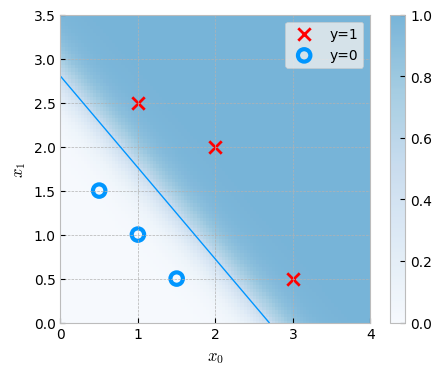

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c=dlc["dlblue"], lw=1)
plt.show()

In the plot above:
 - the shading reflects the probability y=1 (result prior to decision boundary)
 - the decision boundary is the line at which the probability = 0.5

## Another Data set
Let's return to a one-variable data set. With just two parameters, $w$, $b$, it is possible to plot the cost function using a contour plot to get a better idea of what gradient descent is up to.

In [ ]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

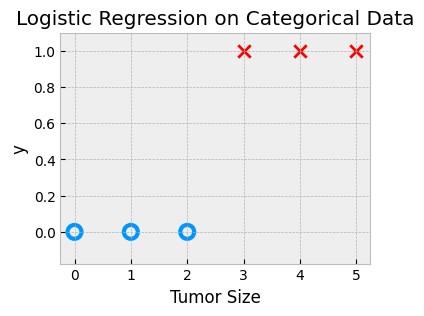

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
plt_tumor_data(x_train, y_train, ax)
plt.show()

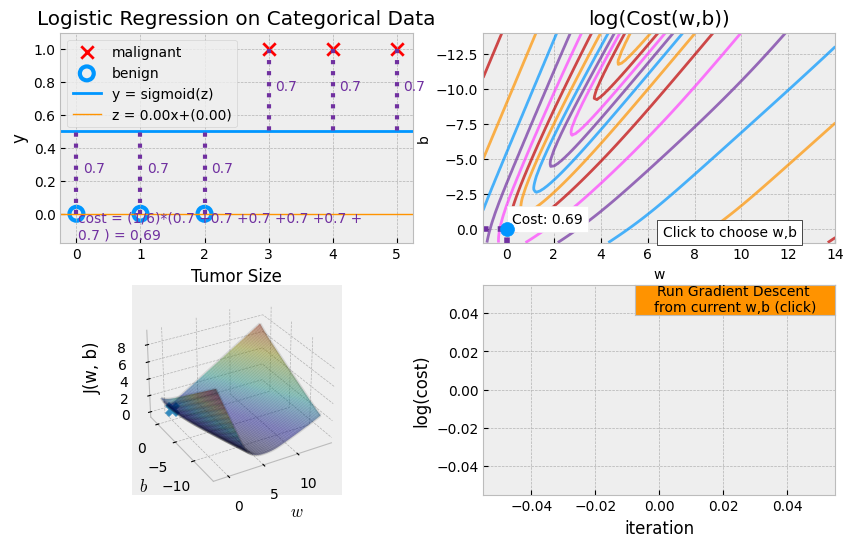

In [ ]:
w_range = np.array([-1, 14])
b_range = np.array([1, -14])
quad = plt_quad_logistic(x_train, y_train, w_range, b_range )

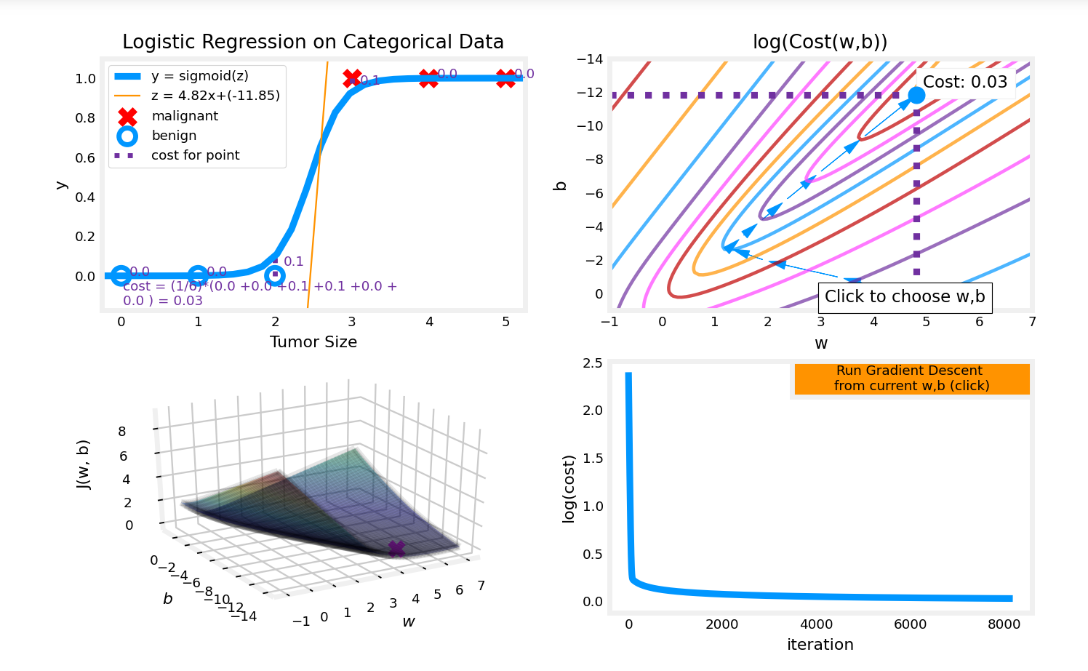